## Machine Learning Project  

**Msc:** Data Science and Advanced Analytics - Major in Bussiness Ananlytics @ NOVA IMS  
**Course:** Machine Learning - 2023/2024 <br>
**Group 27:** <br>
- Joana Macedo - r20201498 <br>
- Ana Morgado - 20230385 <br>
- Gonçalo Caldeirinha - 20230469 <br>
- Taha  Ben Attia - 20230742 <br>
- Emanuele Travisani - 20231243 


<h2 style="color:black">Table of Contents</h2>

[1. Import](#import)<br>
&emsp;[1.1. Import Libraries](#importlibraries)<br>
&emsp;[1.2. Import Datasets](#importdatasets)<br>
[2. Explore Dataset](#Explore)<br>
&emsp;[2.1. Statistical Information](#stats)<br>
&emsp;[2.2. Defining Metric and Non-metric Features](#metric)<br>
[3. Split Data into Train and Val](#split)<br>
[4. Data Pre-processing](#preproc)<br>
&emsp;[4.1. Incoherences and Missclassifications](#inco)<br>
&emsp;[4.2. Duplicates](#dup)<br>
&emsp;[4.3. Treat Outliers](#out)<br>
[5. Feature Engineering](#fe)<br>
&emsp;[5.1. Dummy Variables](#dummy)<br>
&emsp;[5.2. Creation of New Variables](#newvar)<br>
&emsp;[5.3. Renaming Variables](#ren)<br>
[6. Visualizations](#vis)<br>
[7. Split Data into X_train and y_train || X_val and y_val](#split2)<br>
[8. Encoding](#enc)<br>
&emsp;[8.1. Ordinal Encoding](#ord)<br>
&emsp;[8.2. OneHot Encoder](#onehot)<br>
&emsp;[8.3. Target Encoding](#target)<br>
[9. Data Scaling](#scal)<br>
&emsp;[9.1. MinMax Scaler](#minmax)<br>
&emsp;[9.2. Standard Scaler](#std)<br>
[10. Missing Values](#miss)<br>
&emsp;[10.1. KNN imputation](#knn)<br>
[11. Re-sampling Techniques for Imbalanced Classification](#res)<br>
&emsp;[11.1. SmoteNC](#SNC)<br>
&emsp;[11.2. SmoteNN](#SNN)<br>
&emsp;[11.3. SmoteTomek](#STK)<br>
&emsp;[11.4. Undersampling](#under)<br>
&emsp;[11.5. Oversampling](#over)<br>
&emsp;[11.6. Undersampling and Oversampling](#undov)<br>
[12. Feature Selection](#fs)<br>
&emsp;[12.1. Spearman Correlation](#sp)<br>
&emsp;[12.2. Chi-Square](#cs)<br>
&emsp;[12.3. Recursive Feature Elimination - RFE](#rfe)<br>
&emsp;[12.4. LASSO](#lasso)<br>
&emsp;[12.5. K-best](#kb)<br>
&emsp;[12.6. Random Forest](#rf)<br>
&emsp;[12.7. Decision of FS](#dec)<br>
[13. Models](#models)<br>
&emsp;[13.1. Bayes Classifier](#bayes)<br>
&emsp;[13.2. KNN](#knnmodel)<br>
&emsp;[13.3. Decision Trees](#dt)<br>
&emsp;[13.4. Logistic Regression](#lr)<br>
&emsp;[13.5. Neural Network](#nn)<br>
&emsp;[13.6. Support Vector Machines](#svm)<br>
&emsp;[13.7. Random Forest](#rfmodel)<br>








<hr style="border: 1px solid black;">
<a class="anchor" id="import"></a>

# <span style="color:black">1. Import</span>

<a class="anchor" id="importlibraries"></a>

## <span style="color:black">1.1. Import Libraries</span>

We will start by importing the libraries needed.

In [1]:
import pandas as pd
import os
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler, OrdinalEncoder, RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import scipy.stats as stats
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression, LassoCV, RidgeCV, Ridge
from sklearn.svm import SVC
from sklearn.feature_selection import RFE, SelectKBest, chi2, f_regression, RFE, SelectFromModel, mutual_info_classif
import warnings
warnings.filterwarnings('ignore')
import category_encoders as ce
from category_encoders import TargetEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.over_sampling import SMOTE, SMOTENC 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, StratifiedKFold, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix, roc_auc_score,  roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
import time
from sklearn.svm import SVC
from scipy.stats import randint

<a class="anchor" id="importlibraries"></a>

## <span style="color:black">1.2. Import Dataset</span>

In [2]:
#loading file into a dataframe
train_original = pd.read_csv("train.csv", sep = ',')
test_original = pd.read_csv("test.csv", sep = ',')

In [3]:
#create a copy of the original dataframe
data = train_original.copy()
test = test_original.copy()

<hr style="border: 1px solid black;">
<a class="anchor" id="Explore"></a>

# <span style="color:black">2. Explore Dataset</span>

We want to have an overview of the first five rows of the train dataset.

In [4]:
data.head()

,encounter_id,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
0,533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
1,426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
2,634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
3,890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,...,562,455,5,NaN,NaN,No,No,[],No,No
4,654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


Checking how many rows and columns the dataset has.

In [5]:
print('The dataset has a total of', data.shape[0], 'rows and', data.shape[1], 'columns.')

The dataset has a total of 71236 rows and 31 columns.


Setting `encounter_id` as the index.

In [6]:
data.set_index('encounter_id', inplace=True) 
test.set_index('encounter_id', inplace=True) 
data.head()

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
533253,USA,70110,Caucasian,Female,[70-80),?,?,0,0,2,...,276,466,8,NaN,NaN,No,No,[],No,>30 days
426224,USA,29775006,AfricanAmerican,Male,[50-60),?,?,0,0,0,...,785,162,9,NaN,NaN,No,Yes,['insulin'],No,No
634063,USA,80729253,Caucasian,Female,[60-70),?,?,0,0,1,...,135,250,6,NaN,NaN,Ch,Yes,"['glimepiride', 'insulin']",No,No
890610,USA,2919042,AfricanAmerican,Male,[60-70),?,MC,0,0,1,...,562,455,5,NaN,NaN,No,No,[],No,No
654194,USA,84871971,Caucasian,Female,[70-80),?,HM,1,0,0,...,599,428,9,NaN,NaN,No,No,[],No,>30 days


Checking the type of variables we have.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71236 entries, 533253 to 459757
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   country                                71236 non-null  object
 1   patient_id                             71236 non-null  int64 
 2   race                                   67682 non-null  object
 3   gender                                 71236 non-null  object
 4   age                                    67679 non-null  object
 5   weight                                 71236 non-null  object
 6   payer_code                             71236 non-null  object
 7   outpatient_visits_in_previous_year     71236 non-null  int64 
 8   emergency_visits_in_previous_year      71236 non-null  int64 
 9   inpatient_visits_in_previous_year      71236 non-null  int64 
 10  admission_type                         67530 non-null  object
 11  medical_s

<a class="anchor" id="stats"></a>

## <span style="color:black">2.1. Statistical Information</span>

We first evaluated the main statistical characteristics of our variables.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,71236.0,5.430228e+07,3.879585e+07,135.0,23396510.25,45305631.0,87558374.25,189502619.0
outpatient_visits_in_previous_year,71236.0,3.695884e-01,1.287469e+00,0.0,0.00,0.0,0.00,42.0
emergency_visits_in_previous_year,71236.0,1.962491e-01,9.108537e-01,0.0,0.00,0.0,0.00,76.0
inpatient_visits_in_previous_year,71236.0,6.401539e-01,1.267271e+00,0.0,0.00,0.0,1.00,21.0
average_pulse_bpm,71236.0,9.961122e+01,2.304052e+01,60.0,80.00,100.0,119.00,139.0
length_of_stay_in_hospital,71236.0,4.391024e+00,2.988739e+00,1.0,2.00,4.0,6.00,14.0
number_lab_tests,71236.0,4.309565e+01,1.964292e+01,1.0,31.00,44.0,57.00,121.0
non_lab_procedures,71236.0,1.340923e+00,1.706664e+00,0.0,0.00,1.0,2.00,6.0
number_of_medications,71236.0,1.599545e+01,8.122347e+00,1.0,10.00,15.0,20.00,75.0
number_diagnoses,71236.0,7.421023e+00,1.937809e+00,1.0,6.00,8.0,9.00,16.0


In [9]:
data.describe(include=['O']).T

,count,unique,top,freq
country,71236,1,USA,71236
race,67682,6,Caucasian,50693
gender,71236,3,Female,38228
age,67679,10,[70-80),17359
weight,71236,10,?,68990
payer_code,71236,18,?,28201
admission_type,67530,7,Emergency,37742
medical_specialty,71236,69,?,34922
discharge_disposition,68646,25,Discharged to home,42256
admission_source,66518,16,Emergency Room,40319


We noticed that `country` only has one unique value, which is *USA*. We can see that `weight`has a very high percentage of missing values, 96.85%. We will remove it from our analysis.

In [10]:
data.drop('country', axis=1, inplace=True)
data.drop('weight', axis=1, inplace=True)

In [11]:
test.drop('country', axis=1, inplace=True)
test.drop('weight', axis=1, inplace=True)

In [12]:
data.drop('readmitted_multiclass', axis=1, inplace=True)

<a class="anchor" id="metric"></a>

## <span style="color:black">2.2. Defining Metric and Non-metric Features</span>

Dividing the dataset.

In [13]:
data.columns

Index(['patient_id', 'race', 'gender', 'age', 'payer_code',
       'outpatient_visits_in_previous_year',
       'emergency_visits_in_previous_year',
       'inpatient_visits_in_previous_year', 'admission_type',
       'medical_specialty', 'average_pulse_bpm', 'discharge_disposition',
       'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'glucose_test_result', 'a1c_test_result',
       'change_in_meds_during_hospitalization', 'prescribed_diabetes_meds',
       'medication', 'readmitted_binary'],
      dtype='object')

In [14]:
non_metric_features = ["race", "gender", "age", "payer_code","admission_type"
                      , "medical_specialty", "discharge_disposition", "admission_source", "primary_diagnosis", 
                       "secondary_diagnosis", "additional_diagnosis", "glucose_test_result",
                      "a1c_test_result" ,"change_in_meds_during_hospitalization",
                      "prescribed_diabetes_meds", "medication"]
metric_features = ["outpatient_visits_in_previous_year", "emergency_visits_in_previous_year", "inpatient_visits_in_previous_year",
                  "average_pulse_bpm", "length_of_stay_in_hospital", "number_lab_tests", "non_lab_procedures", "number_of_medications",
                  "number_diagnoses"]

<hr style="border: 1px solid black;">
<a class="anchor" id="split"></a>

# <span style="color:black">3. Split Data into Train and Val</span>

In [15]:
X = data.drop(['readmitted_binary'], axis=1)
y = data['readmitted_binary']

# Splitting the data into train and validation
train, val = train_test_split(data, test_size=0.3, random_state=42, stratify=y, shuffle=True)

<hr style="border: 1px solid black;">
<a class="anchor" id="preproc"></a>

# <span style="color:black">4. Data Pre-processing</span>

<a class="anchor" id="inco"></a>

## <span style="color:black">4.1. Incoherences and Missclassifications</span>

Checking for **missclassifications**.

In [16]:
train['gender'].unique()

array(['Male', 'Female', 'Unknown/Invalid'], dtype=object)

In [17]:
train['admission_source'].unique()

array([' Emergency Room', ' Physician Referral', nan,
       ' Transfer from a Skilled Nursing Facility (SNF)',
       'Transfer from a hospital', 'Clinic Referral',
       ' Transfer from another health care facility', ' Not Mapped',
       ' Not Available', 'HMO Referral',
       ' Transfer from critial access hospital',
       ' Transfer from hospital inpt/same fac reslt in a sep claim',
       ' Court/Law Enforcement',
       ' Transfer from Ambulatory Surgery Center', 'Normal Delivery'],
      dtype=object)

In [18]:
train['admission_type'].unique()

array(['Emergency', 'Urgent', 'Elective', 'Not Available', nan,
       'Not Mapped', 'Trauma Center', 'Newborn'], dtype=object)

In [19]:
train['change_in_meds_during_hospitalization'].unique()

array(['No', 'Ch'], dtype=object)

In [20]:
#Replace Special characters for NaN
special_char = ["?"]
train.replace(special_char, np.nan, inplace =True)

#Replace Unknown/Invalid seen in Gender for NaN
special_char1 = ["Unknown/Invalid"]
train.replace(special_char1, np.nan, inplace =True)

#Replace Not mapped/Not Available seen in Admission type and source for Not Available and remove leading spaces. Replace
#NaN for Not Available
train['admission_source'] = train['admission_source'].str.lstrip()
special_char2 = ['Not Mapped', 'Not Available']
train.replace(special_char2, 'Not Available', inplace =True)
train['admission_type'] = train['admission_type'].fillna('Not Available')
train['admission_source'] = train['admission_source'].fillna('Not Available')

#Glucose and ac1 missing values should not be considered missing values
train['glucose_test_result'] = train['glucose_test_result'].fillna('Not Available')
train['a1c_test_result'] = train['a1c_test_result'].fillna('Not Available')

#Change medication where the value is '[]' to 'No medication'
train['medication'] = train['medication'].replace('[]', 'No medication')

#The variable change_in_meds_during_hopitalization has as values 'no' and 'ch' we should change this for 'yes' and 'no'
train['change_in_meds_during_hospitalization']=train['change_in_meds_during_hospitalization'].replace('Ch', 'Yes')

#Filling missing values in medical specialty for 'Unknow'
train['medical_specialty'] = train['medical_specialty'].fillna('Unknown')

#Fillin Nan in payer_code
train['payer_code'] = train['payer_code'].fillna('Not Insured')

#secondary and additional diagnosis can be null
train['secondary_diagnosis'] = train['secondary_diagnosis'].fillna('Not Available')
train['additional_diagnosis'] = train['additional_diagnosis'].fillna('Not Available')

In [21]:
val.replace(special_char, np.nan, inplace =True)
val.replace(special_char1, np.nan, inplace =True)
val['admission_source'] = val['admission_source'].str.lstrip()
val.replace(special_char2, 'Not Available', inplace =True)
val['admission_type'] = val['admission_type'].fillna('Not Available')
val['admission_source'] = val['admission_source'].fillna('Not Available')
val['glucose_test_result'] = val['glucose_test_result'].fillna('Not Available')
val['a1c_test_result'] = val['a1c_test_result'].fillna('Not Available')
val['medication'] = val['medication'].replace('[]', 'No medication')
val['change_in_meds_during_hospitalization']=val['change_in_meds_during_hospitalization'].replace('Ch', 'Yes')
val['medical_specialty'] = val['medical_specialty'].fillna('Unknown')
val['payer_code'] = val['payer_code'].fillna('Not Insured')
val['secondary_diagnosis'] = val['secondary_diagnosis'].fillna('Not Available')
val['additional_diagnosis'] = val['additional_diagnosis'].fillna('Not Available')

In [22]:
test.replace(special_char, np.nan, inplace =True)
test.replace(special_char1, np.nan, inplace =True)
test['admission_source'] = test['admission_source'].str.lstrip()
test.replace(special_char2, 'Not Available', inplace =True)
test['admission_type'] = test['admission_type'].fillna('Not Available')
test['admission_source'] = test['admission_source'].fillna('Not Available')
test['glucose_test_result'] = test['glucose_test_result'].fillna('Not Available')
test['a1c_test_result'] = test['a1c_test_result'].fillna('Not Available')
test['medication'] = test['medication'].replace('[]', 'No medication')
test['change_in_meds_during_hospitalization']=test['change_in_meds_during_hospitalization'].replace('Ch', 'Yes')
test['medical_specialty'] = test['medical_specialty'].fillna('Unknown')
test['payer_code'] = test['payer_code'].fillna('Not Insured')
test['secondary_diagnosis'] = test['secondary_diagnosis'].fillna('Not Available')
test['additional_diagnosis'] = test['additional_diagnosis'].fillna('Not Available')

Checking for **inconsistencies**.

In [23]:
#Check for equal diagnosis

for index, row in train.iterrows():
    if row['primary_diagnosis'] == 'Not Available':
        train.at[index, 'primary_diagnosis'] = row['secondary_diagnosis']
        train.at[index, 'secondary_diagnosis'] = row['additional_diagnosis']
        
    if row['primary_diagnosis'] == row['secondary_diagnosis']:
        train.at[index, 'secondary_diagnosis'] = row['additional_diagnosis']
        train.at[index, 'additional_diagnosis'] = 'Not Available'

    if row['primary_diagnosis'] == row['additional_diagnosis']:
        train.at[index, 'additional_diagnosis'] = 'Not Available'

    if (row['secondary_diagnosis'] == row['additional_diagnosis']
        and row['additional_diagnosis'] != 'Not Available'):
        train.at[index, 'additional_diagnosis'] = 'Not Available'

In [24]:
#Check for equal diagnosis

for index, row in val.iterrows():
    if row['primary_diagnosis'] == 'Not Available':
        val.at[index, 'primary_diagnosis'] = row['secondary_diagnosis']
        val.at[index, 'secondary_diagnosis'] = row['additional_diagnosis']
        
    if row['primary_diagnosis'] == row['secondary_diagnosis']:
        val.at[index, 'secondary_diagnosis'] = row['additional_diagnosis']
        val.at[index, 'additional_diagnosis'] = 'Not Available'

    if row['primary_diagnosis'] == row['additional_diagnosis']:
        val.at[index, 'additional_diagnosis'] = 'Not Available'

    if (row['secondary_diagnosis'] == row['additional_diagnosis']
        and row['additional_diagnosis'] != 'Not Available'):
        val.at[index, 'additional_diagnosis'] = 'Not Available'

In [25]:
#Check for equal diagnosis

for index, row in test.iterrows():
    if row['primary_diagnosis'] == 'Not Available':
        test.at[index, 'primary_diagnosis'] = row['secondary_diagnosis']
        test.at[index, 'secondary_diagnosis'] = row['additional_diagnosis']
        
    if row['primary_diagnosis'] == row['secondary_diagnosis']:
        test.at[index, 'secondary_diagnosis'] = row['additional_diagnosis']
        test.at[index, 'additional_diagnosis'] = 'Not Available'

    if row['primary_diagnosis'] == row['additional_diagnosis']:
        test.at[index, 'additional_diagnosis'] = 'Not Available'

    if (row['secondary_diagnosis'] == row['additional_diagnosis']
        and row['additional_diagnosis'] != 'Not Available'):
        test.at[index, 'additional_diagnosis'] = 'Not Available'

<a class="anchor" id="dup"></a>

## <span style="color:black">4.2. Duplicates</span>

In [26]:
train.duplicated(subset=['patient_id']).sum()

9600

In [27]:
#checking for duplicates in dataset
train.duplicated().sum()

0

<a class="anchor" id="out"></a>

## <span style="color:black">4.3. Treat Outliers</span>

Plotting the **histograms**.

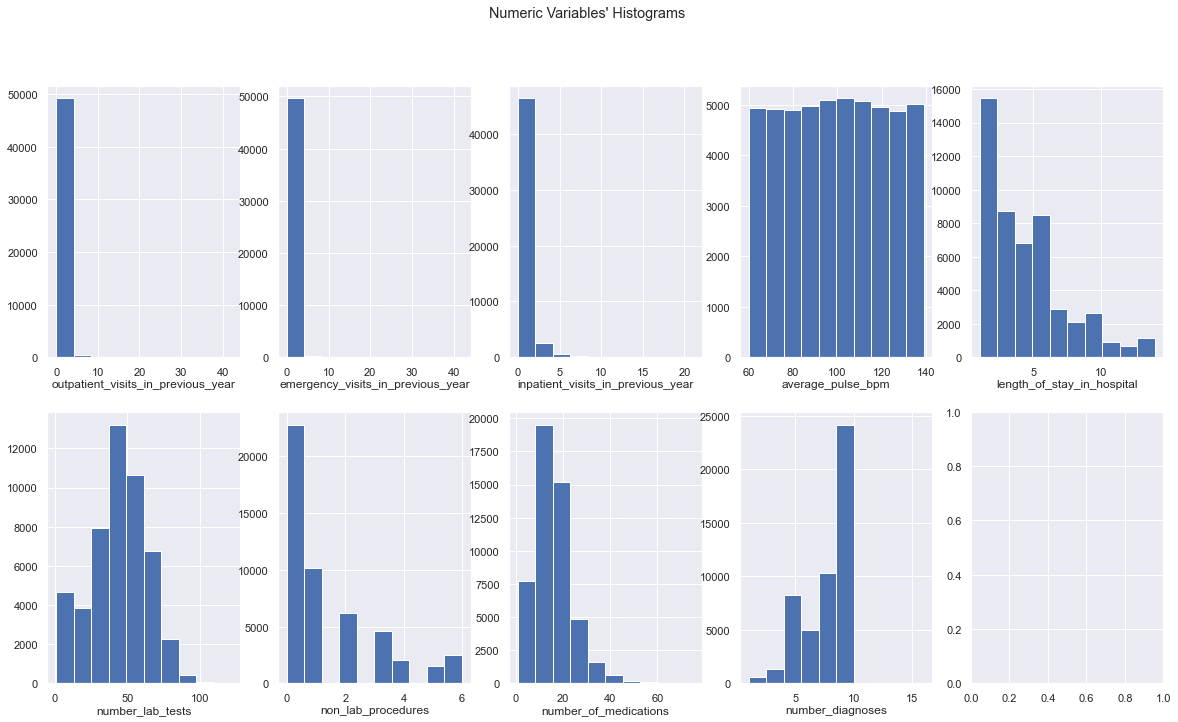

In [28]:
sns.set()

fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(train[feat])
    ax.set_title(feat, y=-0.13)

title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

Plotting the **box plots**.

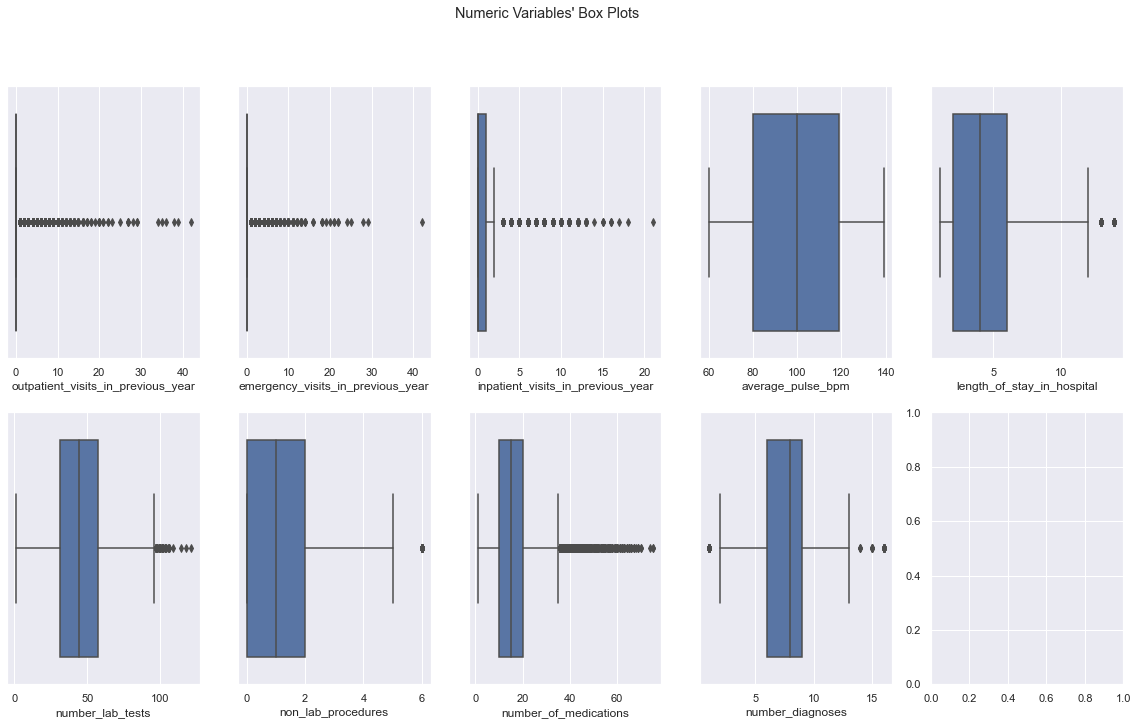

In [29]:
sns.set()

fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(x=train[feat], ax=ax)

title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

Plotting **histograms** for specific varibales.

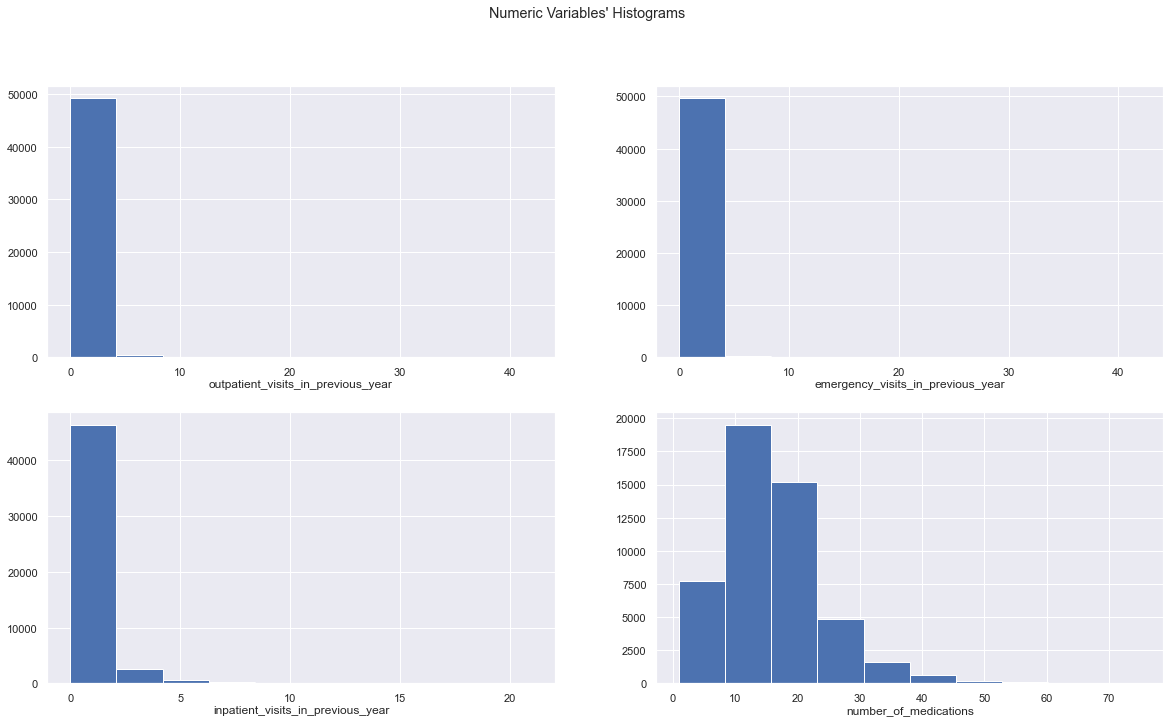

In [30]:
variables_to_plot = ['outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year', 'inpatient_visits_in_previous_year', 'number_of_medications']

sns.set()

fig, axes = plt.subplots(2, ceil(len(variables_to_plot) / 2), figsize=(20, 11))

# Plot data
for ax, feat in zip(axes.flatten(), variables_to_plot):
    ax.hist(train[feat])
    ax.set_title(feat, y=-0.13)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

We can see that 99.96% of the observations of `outpatient_visits_in_previous_year` are bellow 20.

In [31]:
len(train[train['outpatient_visits_in_previous_year'] < 20])/len(train['outpatient_visits_in_previous_year']) *100

99.9558808783716

 We can see that 99.98% of the observations of `emergency_visits_in_previous_year` are bellow 20.

In [32]:
len(train[train['emergency_visits_in_previous_year'] < 20])/len(train['emergency_visits_in_previous_year']) *100

99.97994585380528

We can see that 99.83% of the observations of `inpatient_visits_in_previous_year` are bellow 10.

In [33]:
len(train[train['inpatient_visits_in_previous_year'] < 10])/len(train['inpatient_visits_in_previous_year']) *100

99.82953975734483

We can see that 99.89% of the observations of `number_of_medications` are bellow 60.

In [34]:
len(train[train['number_of_medications'] < 60])/len(train['number_of_medications']) *100

99.88168053745112

There are also outliers in the variables `number_lab_tests`, `non_lab_procedures`, `number_of_medications`, `number_diagnoses`. We will not delete these outliers since they can be important for the study.

<AxesSubplot:xlabel='number_lab_tests'>

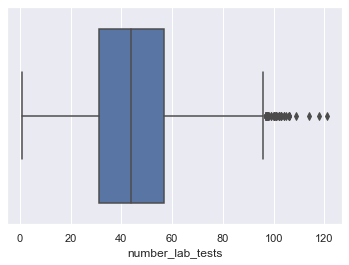

In [35]:
sns.boxplot(x='number_lab_tests', data = train)

<AxesSubplot:xlabel='number_of_medications'>

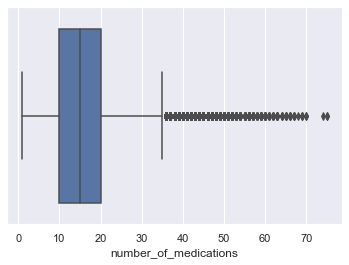

In [36]:
sns.boxplot(x='number_of_medications', data = train)

In [37]:
filters1 = (
   (train['outpatient_visits_in_previous_year']<20)
    &
    (train['emergency_visits_in_previous_year']<15)
    &
    (train['inpatient_visits_in_previous_year']<10)
    &
    (train['number_lab_tests']<125)
    &
    (train['number_of_medications']<50)
    &
    (train['number_diagnoses']<13)
    &
    (train['number_diagnoses']>2)
)

train_box = train[filters1].copy()

In [38]:
print('Percentage of data kept after removing outliers:', np.round(train_box.shape[0] / train.shape[0], 4)*100)

Percentage of data kept after removing outliers: 97.91


In [39]:
q25 = train[metric_features].quantile(.25)
q75 = train[metric_features].quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(train[metric].between(llim, ulim, inclusive='both'))

filters2 = pd.Series(np.all(filters2, 0))
filters2.index = train.index  # Reindexing to match DataFrame indices

train_filtered = train[filters2]
print('Percentage of data kept after removing outliers:', np.round(train_filtered.shape[0] / train.shape[0], 4)*100)

Percentage of data kept after removing outliers: 65.83


In [40]:
train_no_outliers = train[(filters1 | filters2)]
print('Percentage of data kept after removing outliers:', np.round(train_no_outliers.shape[0] / train.shape[0], 4)*100)

Percentage of data kept after removing outliers: 98.81


Since the percentage of data kept is very high, we will proceed with the removal of these outliers.

<hr style="border: 1px solid black;">
<a class="anchor" id="fe"></a>

# <span style="color:black">5. Feature Engineering</span>

Handling 'expired' patients. Deleting patients that have died because they can't be readmitted to the hospital.

In [41]:
train_engineering= train_no_outliers.copy()

In [42]:
expired_count = train_engineering['discharge_disposition'].str.contains('expired', case=False).sum()
print(f"The number of occurrences of 'Expired' in discharge_disposition column: {expired_count}")

The number of occurrences of 'Expired' in discharge_disposition column: 792


In [43]:
train_engineering['discharge_disposition'] = train_engineering['discharge_disposition'].replace(np.nan, 'missing')
train_engineering['discharge_disposition'] = train_engineering['discharge_disposition'].astype(str)
train_engineering = train_engineering[~train_engineering['discharge_disposition'].str.contains('expired', case=False)]
train_engineering['discharge_disposition'] = train_engineering['discharge_disposition'].replace('missing', np.nan)

In [44]:
val['discharge_disposition'] = val['discharge_disposition'].replace(np.nan, 'missing')
val['discharge_disposition'] = val['discharge_disposition'].astype(str)
expired_rows = val[val['discharge_disposition'].str.contains('expired', case=False)]
val = val[~val['discharge_disposition'].str.contains('expired', case=False)]
val['discharge_disposition'] = val['discharge_disposition'].replace('missing', np.nan)

In [45]:
expired_count = test['discharge_disposition'].str.contains('expired', case=False).sum()
print(f"The number of occurrences of 'Expired' in discharge_disposition column: {expired_count}")

The number of occurrences of 'Expired' in discharge_disposition column: 510


In [46]:
test['discharge_disposition'] = test['discharge_disposition'].replace(np.nan, 'missing')
expired_rows = test[test['discharge_disposition'].str.contains('expired', case=False)]
results = pd.DataFrame(index=expired_rows.index)
results['readmitted_binary'] = 0

In [47]:
test = test[~test['discharge_disposition'].str.contains('expired', case=False)]
test['discharge_disposition'] = test['discharge_disposition'].replace('missing', np.nan)

<a class="anchor" id="dummy"></a>

## <span style="color:black">5.1. Dummy variables</span>

In [48]:
train_engineering['change_in_meds_during_hospitalization'].replace('Yes',1,inplace=True)
train_engineering['change_in_meds_during_hospitalization'].replace('No',0,inplace=True)
train_engineering['prescribed_diabetes_meds'].replace('Yes',1,inplace=True)
train_engineering['prescribed_diabetes_meds'].replace('No',0,inplace=True)
train_engineering['gender'].replace('Female',1,inplace=True)
train_engineering['gender'].replace('Male',0,inplace=True)
train_engineering['readmitted_binary'].replace('Yes',1,inplace=True)
train_engineering['readmitted_binary'].replace('No',0,inplace=True)

In [49]:
val['change_in_meds_during_hospitalization'].replace('Yes',1,inplace=True)
val['change_in_meds_during_hospitalization'].replace('No',0,inplace=True)
val['prescribed_diabetes_meds'].replace('Yes',1,inplace=True)
val['prescribed_diabetes_meds'].replace('No',0,inplace=True)
val['gender'].replace('Female',1,inplace=True)
val['gender'].replace('Male',0,inplace=True)
val['readmitted_binary'].replace('Yes',1,inplace=True)
val['readmitted_binary'].replace('No',0,inplace=True)

In [50]:
test['change_in_meds_during_hospitalization'].replace('Yes',1,inplace=True)
test['change_in_meds_during_hospitalization'].replace('No',0,inplace=True)
test['prescribed_diabetes_meds'].replace('Yes',1,inplace=True)
test['prescribed_diabetes_meds'].replace('No',0,inplace=True)
test['gender'].replace('Female',1,inplace=True)
test['gender'].replace('Male',0,inplace=True)

<a class="anchor" id="newvar"></a>

## <span style="color:black">5.2. Creation of New Variables</span>

Creating a new variable called `insurance` that assumes values 0 and 1.

In [51]:
train_engineering['insurance']=train_engineering['payer_code'].apply(lambda x: 0 if x == 'Not Insured' else 1)
val['insurance']=val['payer_code'].apply(lambda x: 0 if x == 'Not Insured' else 1)
test['insurance']=test['payer_code'].apply(lambda x: 0 if x == 'Not Insured' else 1)

Creating a new variable called `caucasian` that assumes values 0 and 1.

In [52]:
race_counts = train_engineering['race'].value_counts()

# Calculate total count
total_count = race_counts.sum()

# Calculate and display percentages for each race category
for race, count in race_counts.items():
    percentage = (count / total_count) * 100
    print(f"{race}: {percentage:.2f}%")

Caucasian: 76.49%
AfricanAmerican: 19.21%
Hispanic: 2.15%
Other: 1.49%
Asian: 0.66%


In [53]:
train_engineering['caucasian'] = train_engineering['race'].apply(lambda x: 1 if x == 'Caucasian' else 0)
val['caucasian'] = val['race'].apply(lambda x: 1 if x == 'Caucasian' else 0)
test['caucasian'] = test['race'].apply(lambda x: 1 if x == 'Caucasian' else 0)

Creating a new variable called `diagnosis_count` that sums all diagnosis.

In [54]:
train_engineering['diagnosis_count'] = train_engineering[['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis']].count(axis=1)
val['diagnosis_count'] = val[['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis']].count(axis=1)
test['diagnosis_count'] = test[['primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis']].count(axis=1)

Creating a new variable called `diabetes_type` that sees if the patient has 'Type II Diabetes' or 'Type I Diabetes', or 'Unknown' according to the medication prescribed.

In [55]:
unique_medication = train_engineering['medication'].nunique()

print("Number of unique medications:", unique_medication)

Number of unique medications: 272


In [56]:
# Splitting medications into individual words and creating a list of all medications
all_medications = train_engineering['medication'].str.replace("[\[\]']", "").str.split(", ")

# Creating a flat list of all medications
all_medications_flat = [med for sublist in all_medications for med in sublist]

# Counting unique medications
unique_medications_count = pd.Series(all_medications_flat).value_counts()

print(unique_medications_count)
print("Number of unique medications:", len(unique_medications_count))

insulin                    25710
No medication              11089
metformin                   9676
glipizide                   6178
glyburide                   5199
pioglitazone                3440
rosiglitazone               3082
glimepiride                 2489
repaglinide                  756
glyburide-metformin          324
nateglinide                  321
acarbose                     139
chlorpropamide                39
miglitol                      20
tolazamide                    14
tolbutamide                    9
glipizide-metformin            7
troglitazone                   2
acetohexamide                  1
metformin-rosiglitazone        1
metformin-pioglitazone         1
dtype: int64
Number of unique medications: 21


In [57]:
# Function to categorize diabetes type
def categorize_diabetes(row):
    if row['medication'] == "['insulin']":
        return 'Type I Diabetes'
    elif row['medication'] == 'No medication':
        return 'Unknown'
    else:
        return 'Type II Diabetes'

# Apply function to create the new variable 'diabetes_type'
train_engineering['diabetes_type'] = train_engineering.apply(categorize_diabetes, axis=1)
val['diabetes_type'] = val.apply(categorize_diabetes, axis=1)
test['diabetes_type'] = test.apply(categorize_diabetes, axis=1)

Creating a new variable called `total_procedures` that sums all the procedures done, either lab or not.

In [58]:
train_engineering['total_procedures'] = train_engineering['number_lab_tests'] + train_engineering['non_lab_procedures']
val['total_procedures'] = val['number_lab_tests'] + val['non_lab_procedures']
test['total_procedures'] = test['number_lab_tests'] + test['non_lab_procedures']

Creating a new variable called `total_visits` that sums all types of visits made in the year before the encounter.

In [59]:
train_engineering['total_visits'] = train_engineering['outpatient_visits_in_previous_year']+train_engineering['emergency_visits_in_previous_year']+train_engineering['inpatient_visits_in_previous_year']
val['total_visits'] = val['outpatient_visits_in_previous_year']+val['emergency_visits_in_previous_year']+val['inpatient_visits_in_previous_year']
test['total_visits'] = test['outpatient_visits_in_previous_year']+test['emergency_visits_in_previous_year']+test['inpatient_visits_in_previous_year']

Creating a new variable called `age_group` that groups ages into certain categories.

In [60]:
conditions = [
    train_engineering['age'].isna(),
    (train_engineering['age'] == '[0-10)'),
    (train_engineering['age'] == '[10-20)'),
    (train_engineering['age'] == '[20-30)'),
    (train_engineering['age'] == '[30-40)') | (train_engineering['age'] == '[40-50)') | (train_engineering['age'] == '[50-60)'),
    (train_engineering['age'] == '[60-70)') | (train_engineering['age'] == '[70-80)') | (train_engineering['age'] == '[80-90)') | (train_engineering['age'] == '[90-100)')
]

groups = ['missing', 'Child', 'Teen', 'Young Adult', 'Adult', 'Elderly']

train_engineering['age_group'] = np.select(conditions, groups)
train_engineering['age_group'] = train_engineering['age_group'].replace('missing', np.nan)

In [61]:
conditions = [
    val['age'].isna(),
    (val['age'] == '[0-10)'),
    (val['age'] == '[10-20)'),
    (val['age'] == '[20-30)'),
    (val['age'] == '[30-40)') | (val['age'] == '[40-50)') | (val['age'] == '[50-60)'),
    (val['age'] == '[60-70)') | (val['age'] == '[70-80)') | (val['age'] == '[80-90)') | (val['age'] == '[90-100)')
]

groups = ['missing', 'Child', 'Teen', 'Young Adult', 'Adult', 'Elderly']

val['age_group'] = np.select(conditions, groups)
val['age_group'] = val['age_group'].replace('missing', np.nan)

In [62]:
conditions = [
    test['age'].isna(),
    (test['age'] == '[0-10)'),
    (test['age'] == '[10-20)'),
    (test['age'] == '[20-30)'),
    (test['age'] == '[30-40)') | (test['age'] == '[40-50)') | (test['age'] == '[50-60)'),
    (test['age'] == '[60-70)') | (test['age'] == '[70-80)') | (test['age'] == '[80-90)') | (test['age'] == '[90-100)')
]

groups = ['missing', 'Child', 'Teen', 'Young Adult', 'Adult', 'Elderly']

test['age_group'] = np.select(conditions, groups)
test['age_group'] = test['age_group'].replace('missing', np.nan)

Creating a new variable called `encounter_count` that counts all the encounter made by the same patient.

In [63]:
train_engineering.reset_index(inplace=True)
encounter_count_per_patient = train_engineering.groupby('patient_id').size().reset_index(name='encounter_count')
train_engineering = train_engineering.merge(encounter_count_per_patient, on='patient_id', how='left')
train_engineering.set_index('encounter_id', inplace=True)

In [64]:
val.reset_index(inplace=True)
encounter_count_per_patient = val.groupby('patient_id').size().reset_index(name='encounter_count')
val = val.merge(encounter_count_per_patient, on='patient_id', how='left')
val.set_index('encounter_id', inplace=True)

In [65]:
test.reset_index(inplace=True)
encounter_count_per_patient = test.groupby('patient_id').size().reset_index(name='encounter_count')
test = test.merge(encounter_count_per_patient, on='patient_id', how='left')
test.set_index('encounter_id', inplace=True)

Creating a new variable called `avg_length_of_stay` that does the average of the lenght of stay of each patient.

In [66]:
train_engineering['avg_length_of_stay'] = train_engineering.groupby('patient_id')['length_of_stay_in_hospital'].transform('mean')
val['avg_length_of_stay'] = val.groupby('patient_id')['length_of_stay_in_hospital'].transform('mean')
test['avg_length_of_stay'] = test.groupby('patient_id')['length_of_stay_in_hospital'].transform('mean')

Creating a new variable called `total_visits_pp` that calculates all visits done by that patient.

In [67]:
train_engineering['total_visits_pp'] = train_engineering.groupby('patient_id')['total_visits'].transform('sum')
val['total_visits_pp'] = val.groupby('patient_id')['total_visits'].transform('sum')
test['total_visits_pp'] = test.groupby('patient_id')['total_visits'].transform('sum')

We no longer need the variable `patient_id` so lets drop it.

In [68]:
train_engineering.drop(columns=['patient_id'], inplace=True)
val.drop(columns=['patient_id'], inplace=True)
test.drop(columns=['patient_id'], inplace=True)

**Grouping categories of certain variables**

In [69]:
for column_name in non_metric_features:
    frequency_count = train_engineering[column_name].value_counts()
    print(f"Frequency count for column '{column_name}':")
    print(frequency_count)
    print("\n")

Frequency count for column 'race':
Caucasian          34458
AfricanAmerican     8653
Hispanic             967
Other                673
Asian                297
Name: race, dtype: int64


Frequency count for column 'gender':
1.0    25999
0.0    22480
Name: gender, dtype: int64


Frequency count for column 'age':
[70-80)     11887
[60-70)     10157
[80-90)      7828
[50-60)      7757
[40-50)      4406
[30-40)      1757
[90-100)     1251
[20-30)       675
[10-20)       287
[0-10)         57
Name: age, dtype: int64


Frequency count for column 'payer_code':
Not Insured    19240
MC             15363
HM              2985
SP              2418
BC              2241
MD              1670
CP              1208
UN              1181
CM               922
OG               468
PO               283
DM               251
WC                68
CH                66
OT                46
MP                38
SI                34
Name: payer_code, dtype: int64


Frequency count for column 'admission_type':
Emerg

Grouping categories in `primary_diagnosis`, `secondary_diagnosis` and `additional_diagnosis`.

In [70]:
def group_diagnosis(code):
    if pd.isnull(code):  # Check if the value is NaN (missing)
        return np.nan
    elif isinstance(code, str) and (code.isdigit() or code.replace('.', '', 1).isdigit()):
        code = float(code)
        if 1 <= code <= 139:
            return '1-139'
        elif 140 <= code <= 239:
            return '140-239'
        elif 240 <= code <= 279:
            return '240-279'
        elif 280 <= code <= 289:
            return '280-289'
        elif 290 <= code <= 319:
            return '290-319'
        elif 320 <= code <= 389:
            return '320-389'
        elif 390 <= code <= 459:
            return '390-459'
        elif 460 <= code <= 519:
            return '460-519'
        elif 520 <= code <= 579:
            return '520-579'
        elif 580 <= code <= 629:
            return '580-629'
        elif 630 <= code <= 679:
            return '630-679'
        elif 680 <= code <= 709:
            return '680-709'
        elif 710 <= code <= 739:
            return '710-739'
        elif 740 <= code <= 759:
            return '740-759'
        elif 760 <= code <= 779:
            return '760-779'
        elif 780 <= code <= 799:
            return '780-799'
        elif 800 <= code <= 999:  
            return '800-999'
    elif isinstance(code, str) and (code.startswith('E') or code.startswith('V')):
        return 'E and V'   
    return 'Not Available'

# Apply the function to create new columns in the DataFrame with the grouped code ranges
train_engineering['diag1_type'] = train_engineering['primary_diagnosis'].apply(group_diagnosis)
train_engineering['diag2_type'] = train_engineering['secondary_diagnosis'].apply(group_diagnosis)
train_engineering['diag_add_type'] = train_engineering['additional_diagnosis'].apply(group_diagnosis)

val['diag1_type'] = val['primary_diagnosis'].apply(group_diagnosis)
val['diag2_type'] = val['secondary_diagnosis'].apply(group_diagnosis)
val['diag_add_type'] = val['additional_diagnosis'].apply(group_diagnosis)

test['diag1_type'] = test['primary_diagnosis'].apply(group_diagnosis)
test['diag2_type'] = test['secondary_diagnosis'].apply(group_diagnosis)
test['diag_add_type'] = test['additional_diagnosis'].apply(group_diagnosis)

Dropping variables not needed anymore.

In [71]:
train_engineering.drop('primary_diagnosis', axis=1, inplace=True)
train_engineering.drop('secondary_diagnosis', axis=1, inplace=True)
train_engineering.drop('additional_diagnosis', axis=1, inplace=True)

val.drop('primary_diagnosis', axis=1, inplace=True)
val.drop('secondary_diagnosis', axis=1, inplace=True)
val.drop('additional_diagnosis', axis=1, inplace=True)

test.drop('primary_diagnosis', axis=1, inplace=True)
test.drop('secondary_diagnosis', axis=1, inplace=True)
test.drop('additional_diagnosis', axis=1, inplace=True)

Grouping categories in `medical_specialty`.

In [72]:
train_engineering['medical_specialty'].unique()

array(['Unknown', 'InternalMedicine', 'Cardiology',
       'Orthopedics-Reconstructive', 'Emergency/Trauma',
       'Family/GeneralPractice', 'Surgery-General', 'Urology', 'Surgeon',
       'Orthopedics', 'ObstetricsandGynecology', 'Radiologist',
       'Pediatrics', 'Surgery-Neuro', 'Nephrology', 'Neurology',
       'Surgery-Vascular', 'Psychiatry',
       'PhysicalMedicineandRehabilitation', 'Pulmonology',
       'Gastroenterology', 'Endocrinology', 'Anesthesiology-Pediatric',
       'Hematology/Oncology', 'Oncology',
       'Surgery-Cardiovascular/Thoracic', 'Hematology', 'Gynecology',
       'Pediatrics-Neurology', 'Pediatrics-Endocrinology', 'Pathology',
       'Rheumatology', 'Otolaryngology', 'Surgery-Thoracic',
       'OutreachServices', 'Psychiatry-Child/Adolescent', 'Podiatry',
       'Obsterics&Gynecology-GynecologicOnco', 'Radiology',
       'Pediatrics-CriticalCare', 'Pediatrics-Pulmonology',
       'AllergyandImmunology', 'Obstetrics', 'Psychology', 'Osteopath',
       'S

In [73]:
group_mapping = {
    
    'GeneralSurgery': [
        'Surgeon', 'Surgery-Cardiovascular', 'Surgery-Cardiovascular/Thoracic',
        'Surgery-Colon&Rectal', 'Surgery-General', 'Surgery-Maxillofacial',
        'Surgery-Neuro', 'Surgery-Pediatric',
        'Surgery-Plastic', 'Surgery-Thoracic', 'Surgery-Vascular', 'SurgicalSpecialty'
    ],
    
    'InternalMedicine': [
        'Cardiology', 'DCPTEAM', 'Endocrinology', 'Endocrinology-Metabolism',
        'Gastroenterology', 'Hematology', 'Hematology/Oncology', 'Hospitalist',
        'InfectiousDiseases', 'InternalMedicine', 'Nephrology',
        'Oncology', 'Proctology', 'Pulmonology', 'Rheumatology', 'SportsMedicine',
        'Urology'
    ],
    
    'Obstetrics&Gynecology': ['Gynecology', 'Obsterics&Gynecology-GynecologicOnco', 'Obstetrics', 
'ObstetricsandGynecology'],
    
    'Pediatrics': ['Cardiology-Pediatric', 'Pediatrics', 'Pediatrics-AllergyandImmunology', 'Pediatrics-CriticalCare', 
                   'Pediatrics-EmergencyMedicine', 'Pediatrics-Endocrinology', 'Pediatrics-Hematology-Oncology', 
                   'Pediatrics-InfectiousDiseases', 'Pediatrics-Neurology', 'Pediatrics-Pulmonology',
                  'Psychiatry-Child/Adolescent'
                   
],
    
    'Anesthesiology': ['Anesthesiology', 'Anesthesiology-Pediatric'],
    
    'DiagnosticRadiology': ['Radiologist', 'Radiology'],
    
    'OrthopedicSurgery': ['Orthopedics', 'Orthopedics-Reconstructive'],
    
    'Other': ['Dentistry', 'Podiatry', 'Psychology', 'Resident', 'Speech', 'OutreachServices'],
    
    'PhysicalMedicineandRehabilitation': ['PhysicalMedicineandRehabilitation', 'PhysicianNotFound']
}


def map_specialty(spec):
    for group, specialties in group_mapping.items():
        if spec in specialties:
            return group
    return spec  

train_engineering['medical_specialty'] = train_engineering['medical_specialty'].apply(map_specialty)
val['medical_specialty'] = val['medical_specialty'].apply(map_specialty)
test['medical_specialty'] = test['medical_specialty'].apply(map_specialty)

In [74]:
train_engineering.head()

,race,gender,age,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,admission_type,medical_specialty,average_pulse_bpm,...,diabetes_type,total_procedures,total_visits,age_group,encounter_count,avg_length_of_stay,total_visits_pp,diag1_type,diag2_type,diag_add_type
encounter_id,,,,,,,,,,,,,,,,,,,,,
767545,Caucasian,0.0,[50-60),HM,3,0,0,Emergency,Unknown,131,...,Unknown,48,3,Adult,1,4.0,3,240-279,710-739,680-709
260242,Caucasian,1.0,[60-70),MC,2,0,0,Emergency,Unknown,130,...,Type I Diabetes,1,2,Elderly,1,3.0,2,320-389,800-999,710-739
793358,Caucasian,0.0,[50-60),Not Insured,0,0,0,Urgent,InternalMedicine,60,...,Unknown,46,0,Adult,1,5.0,0,780-799,520-579,390-459
907877,AfricanAmerican,1.0,[70-80),Not Insured,0,0,0,Emergency,Unknown,69,...,Type I Diabetes,2,0,Elderly,1,5.0,0,390-459,390-459,390-459
339521,Caucasian,0.0,[80-90),Not Insured,0,0,0,Emergency,Unknown,65,...,Type II Diabetes,59,0,Elderly,1,4.0,0,780-799,240-279,240-279


<a class="anchor" id="ren"></a>

## <span style="color:black">5.3. Renaming variables</span>

In [75]:
train_engineering = train_engineering.rename(
    columns={
        'encounter_ID': 'ID',
        'outpatient_visits_in_previous_year': 'outpatient',
        'emergency_visits_in_previous_year': 'emergency',
        'inpatient_visits_in_previous_year': 'inpatient',
        'average_pulse_bpm': 'avg_bpm',
        'length_of_stay_in_hospital': 'stay_length',
        'change_in_meds_during_hospitalization': 'meds_change',
        'a1c_test_result':'a1c',
        'glucose_test_result':'glucose'
        
    })

val = val.rename(
    columns={
        'encounter_ID': 'ID',
        'outpatient_visits_in_previous_year': 'outpatient',
        'emergency_visits_in_previous_year': 'emergency',
        'inpatient_visits_in_previous_year': 'inpatient',
        'average_pulse_bpm': 'avg_bpm',
        'length_of_stay_in_hospital': 'stay_length',
        'change_in_meds_during_hospitalization': 'meds_change',
        'a1c_test_result':'a1c',
        'glucose_test_result':'glucose'
        
    })

test = test.rename(
    columns={
        'encounter_ID': 'ID',
        'outpatient_visits_in_previous_year': 'outpatient',
        'emergency_visits_in_previous_year': 'emergency',
        'inpatient_visits_in_previous_year': 'inpatient',
        'average_pulse_bpm': 'avg_bpm',
        'length_of_stay_in_hospital': 'stay_length',
        'change_in_meds_during_hospitalization': 'meds_change',
        'a1c_test_result':'a1c',
        'glucose_test_result':'glucose'
        
    })

Updating non_metric and metric features.

In [76]:
non_metric_features[non_metric_features.index('glucose_test_result')] = 'glucose'
non_metric_features[non_metric_features.index('a1c_test_result')] = 'a1c'
non_metric_features[non_metric_features.index('change_in_meds_during_hospitalization')] = 'meds_change'
metric_features[metric_features.index('outpatient_visits_in_previous_year')] = 'outpatient'
metric_features[metric_features.index('inpatient_visits_in_previous_year')] = 'inpatient'
metric_features[metric_features.index('emergency_visits_in_previous_year')] = 'emergency'
metric_features[metric_features.index('average_pulse_bpm')] = 'avg_bpm'
metric_features[metric_features.index('length_of_stay_in_hospital')] = 'stay_length'

In [77]:
new_metric_columns = ['total_procedures', 'total_visits', 'avg_length_of_stay', 'total_visits_pp'
                      , 'encounter_count', 'diagnosis_count']

metric_features.extend(new_metric_columns)

In [78]:
columns_in_train_engineering = train_engineering.columns.tolist()

non_metric_features = [
    column for column in columns_in_train_engineering
    if column not in metric_features
]

In [79]:
non_metric_features.remove('readmitted_binary')

<hr style="border: 1px solid black;">
<a class="anchor" id="vis"></a>

# <span style="color:black">6. Visualizations</span>

In [80]:
train_copy = train_engineering.copy()

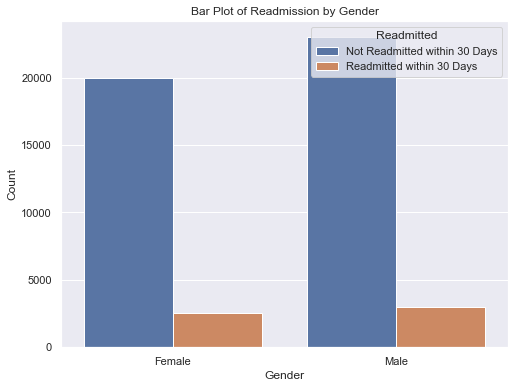

In [81]:
train_copy['readmitted_binary'] = train_copy['readmitted_binary'].replace({0: 'Not Readmitted within 30 Days', 1: 'Readmitted within 30 Days'})
train_copy['gender'] = train_copy['gender'].replace({0: 'Female', 1: 'Male'})

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='readmitted_binary', data=train_copy)
plt.title('Bar Plot of Readmission by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Readmitted', loc='upper right')
plt.show()

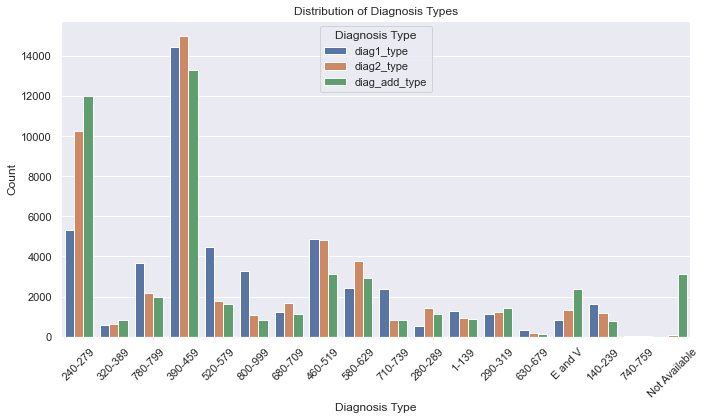

In [82]:
diagnosis_types = train_engineering[['diag1_type', 'diag2_type', 'diag_add_type']]
diagnosis_types = diagnosis_types.melt(var_name='Diagnosis Type')

plt.figure(figsize=(10, 6))
sns.countplot(data=diagnosis_types, x='value', hue='Diagnosis Type')
plt.title('Distribution of Diagnosis Types')
plt.xlabel('Diagnosis Type')
plt.ylabel('Count')
plt.legend(title='Diagnosis Type')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

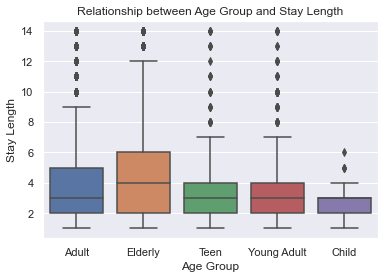

In [83]:
sns.boxplot(x='age_group', y='stay_length', data=train_engineering)
plt.title('Relationship between Age Group and Stay Length')
plt.xlabel('Age Group')
plt.ylabel('Stay Length')
plt.show()

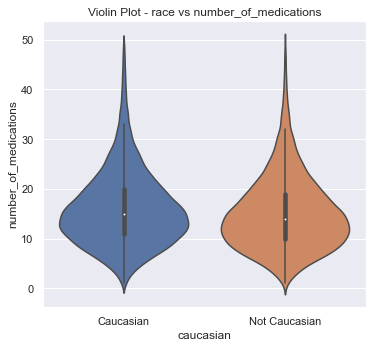

In [84]:
train_copy['caucasian'] = train_copy['caucasian'].replace({0: 'Not Caucasian', 1: 'Caucasian'})

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
sns.violinplot(x='caucasian', y='number_of_medications', data=train_copy)
plt.title('Violin Plot - race vs number_of_medications')

plt.tight_layout()
plt.show()

<hr style="border: 1px solid black;">
<a class="anchor" id="split2"></a>

# <span style="color:black">7. Split Data into X_train and y_train || X_val and y_val</span>

In [85]:
X_train=train_engineering.drop(columns=['readmitted_binary'],axis=1)
y_train=train_engineering['readmitted_binary']

In [86]:
X_val=val.drop(columns=['readmitted_binary'],axis=1)
y_val=val['readmitted_binary']

In [87]:
X_test=test.copy()

<hr style="border: 1px solid black;">
<a class="anchor" id="enc"></a>

# <span style="color:black">8. Encoding </span>

<a class="anchor" id="ord"></a>

## <span style="color:black">8.1. Ordinal Encoding </span>

In [88]:
columns_to_encode = ['age_group', 'a1c', 'glucose', 'age']

a1c_categories = ['Not Available', 'Norm', '>7', '>8']
glucose_categories = ['Not Available', 'Norm', '>200', '>300']
Age_categories = ['Child', 'Teen', 'Young Adult', 'Adult', 'Elderly']

# Mask missing values in 'AgeGroup'
mask_train_age = X_train['age_group'].notnull()
mask_val_age = X_val['age_group'].notnull()
mask_test_age = X_test['age_group'].notnull()

encoder_a1c = OrdinalEncoder(categories=[a1c_categories])
encoder_glucose = OrdinalEncoder(categories=[glucose_categories])
encoder_age = OrdinalEncoder(categories=[Age_categories])

# Encode 'a1c' and 'glucose' columns
X_train['a1c'] = encoder_a1c.fit_transform(X_train[['a1c']])
X_train['glucose'] = encoder_glucose.fit_transform(X_train[['glucose']])

X_val['a1c'] = encoder_a1c.transform(X_val[['a1c']])
X_val['glucose'] = encoder_glucose.transform(X_val[['glucose']])

X_test['a1c'] = encoder_a1c.transform(X_test[['a1c']])
X_test['glucose'] = encoder_glucose.transform(X_test[['glucose']])

# Encode 'AgeGroup' while maintaining missing values
X_train.loc[mask_train_age, 'age_group'] = encoder_age.fit_transform(X_train.loc[mask_train_age, ['age_group']])
X_val.loc[mask_val_age, 'age_group'] = encoder_age.transform(X_val.loc[mask_val_age, ['age_group']])
X_test.loc[mask_test_age, 'age_group'] = encoder_age.transform(X_test.loc[mask_test_age, ['age_group']])

In [89]:
age_cat = ['[50-60)', '[60-70)', '[70-80)', '[80-90)', '[30-40)',
       '[40-50)', '[90-100)', '[10-20)', '[20-30)', '[0-10)']

mask_train_age1 = X_train['age'].notnull()
mask_val_age1 = X_val['age'].notnull()
mask_test_age1 = X_test['age'].notnull()

encoder_age = OrdinalEncoder(categories=[age_cat])

X_train.loc[mask_train_age1, 'age'] = encoder_age.fit_transform(X_train.loc[mask_train_age1, ['age']])
X_val.loc[mask_val_age1, 'age'] = encoder_age.transform(X_val.loc[mask_val_age1, ['age']])
X_test.loc[mask_test_age1, 'age'] = encoder_age.transform(X_test.loc[mask_test_age1, ['age']])

<a class="anchor" id="ord"></a>

## <span style="color:black">8.2. OneHot Encoder </span>

In [90]:
# X_trainONEHOT = X_train.copy()
# X_valONEHOT = X_val.copy()
# testONEHOT=test.copy()

In [91]:
# non_metric_features

In [92]:
# ohc_feat = ohc.fit_transform(np.array(X_trainONEHOT[columns_to_encode_ONEHOT]))

# ohc = OneHotEncoder(sparse=False, drop="first", handle_unknown='ignore')
# ohc_feat = ohc.fit_transform(np.array(X_trainONEHOT[columns_to_encode_ONEHOT]))
# ohc_feat_names = ohc.get_feature_names_out()
# ohc_df = pd.DataFrame(ohc_feat, index=X_trainONEHOT.index, columns=ohc_feat_names)  
# ohc_df

In [93]:
# X_trainONEHOT = pd.concat([X_trainONEHOT.drop(columns= columns_to_encode_ONEHOT), ohc_df], axis=1)
# X_trainONEHOT.head()

In [94]:
# ohc_feat_VAL = ohc.transform(np.array(X_valONEHOT[columns_to_encode_ONEHOT]))
# ohc_feat_names_val = ohc.get_feature_names_out()
# ohc_df_val = pd.DataFrame(ohc_feat_VAL, index=X_valONEHOT.index, columns=ohc_feat_names_val)  

In [95]:
# X_valONEHOT = pd.concat([X_valONEHOT.drop(columns= columns_to_encode_ONEHOT), ohc_df_val], axis=1)

In [96]:
# ohc_feat_TEST = ohc.transform(np.array(testONEHOT[columns_to_encode_ONEHOT]))
# ohc_feat_names = ohc.get_feature_names_out()
# ohc_df_test = pd.DataFrame(ohc_feat_TEST, index=testONEHOT.index, columns=ohc_feat_names)  

In [97]:
# testONEHOT = pd.concat([testONEHOT.drop(columns= columns_to_encode_ONEHOT), ohc_df_test], axis=1)

In [98]:
# X_train = X_trainONEHOT.copy()
# X_val = X_valONEHOT.copy()
# test = testONEHOT.copy()

<a class="anchor" id="target"></a>

## <span style="color:black">8.3. Target Encoding</span>

In [99]:
columns_to_encode_target = ['race', 'admission_type', 'medical_specialty', 'discharge_disposition', 'admission_source',
                     'glucose', 'a1c','medication', 'diag1_type', 'diag2_type', 'diag_add_type', 'payer_code', 'diabetes_type']

In [100]:
X_trainTARGET=X_train.copy()
X_valTARGET=X_val.copy()
X_testTARGET=X_test.copy()

In [101]:
# Create a mask for missing values
missing_mask_train = X_trainTARGET[columns_to_encode_target].isnull()
missing_mask_val = X_valTARGET[columns_to_encode_target].isnull()
missing_mask_test = X_testTARGET[columns_to_encode_target].isnull()

# Apply TargetEncoder to non-missing values
encoder = ce.TargetEncoder(cols=columns_to_encode_target, smoothing=0.5)
X_trainTARGET_encoded = encoder.fit_transform(X_trainTARGET[columns_to_encode_target], y_train)
X_valTARGET_encoded = encoder.transform(X_valTARGET[columns_to_encode_target])
X_testTARGET_encoded = encoder.transform(X_testTARGET[columns_to_encode_target])

# Combine encoded values with missing values
X_trainTARGET[columns_to_encode_target] = np.where(missing_mask_train, np.nan, X_trainTARGET_encoded)
X_valTARGET[columns_to_encode_target] = np.where(missing_mask_val, np.nan, X_valTARGET_encoded)
X_testTARGET[columns_to_encode_target] = np.where(missing_mask_test, np.nan, X_testTARGET_encoded)

In [102]:
X_train = X_trainTARGET.copy()
X_val = X_valTARGET.copy()
X_test = X_testTARGET.copy()

<hr style="border: 1px solid black;">
<a class="anchor" id="scal"></a>

# <span style="color:black">9. Data Scaling </span>

In [103]:
columns_to_exclude = ['caucasian', 'gender', 'meds_change', 'prescribed_diabetes_meds','insurance']
columns_to_scale = [col for col in X_train.columns if col not in columns_to_exclude]

In [104]:
X_train_scale = X_train[columns_to_scale].set_index(X_train.index)
X_val_scale = X_val[columns_to_scale].set_index(X_val.index)
X_test_scale = X_test[columns_to_scale].set_index(X_test.index)

<a class="anchor" id="minmax"></a>

## <span style="color:black">9.1. MinMax Scaler </span>

In [105]:
#call function
scaler = MinMaxScaler()

#fit to training data
scaler.fit(X_train_scale)

#transform the data
X_train_minmax = scaler.transform(X_train_scale) # this will return an array

# Convert the array to a pandas dataframe
X_train_minmax = pd.DataFrame(X_train_minmax, columns = X_train_scale.columns).set_index(X_train.index)
X_train_minmax

X_val_minmax = scaler.transform(X_val_scale)
X_val_minmax = pd.DataFrame(X_val_minmax, columns = X_val_scale.columns).set_index(X_val.index)

X_test_minmax = scaler.transform(X_test_scale)
X_test_minmax = pd.DataFrame(X_test_minmax, columns = X_test_scale.columns).set_index(X_test.index)

X_train[columns_to_scale] = X_train_minmax
X_val[columns_to_scale] = X_val_minmax
X_test[columns_to_scale] = X_test_minmax

In [106]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
race,45048.0,0.955736,0.132108,0.0,1.000000,1.000000,1.000000,1.0
gender,48479.0,0.536294,0.498686,0.0,0.000000,1.000000,1.000000,1.0
age,46062.0,0.245806,0.199104,0.0,0.111111,0.222222,0.333333,1.0
payer_code,48482.0,0.710243,0.112020,0.0,0.732072,0.745790,0.793481,1.0
outpatient,48482.0,0.018542,0.058752,0.0,0.000000,0.000000,0.000000,1.0
emergency,48482.0,0.013053,0.049980,0.0,0.000000,0.000000,0.000000,1.0
inpatient,48482.0,0.068248,0.129025,0.0,0.000000,0.000000,0.111111,1.0
admission_type,48482.0,0.681509,0.381736,0.0,0.520479,1.000000,1.000000,1.0
medical_specialty,48482.0,0.652800,0.069063,0.0,0.638485,0.678178,0.678178,1.0
avg_bpm,48482.0,0.501076,0.291118,0.0,0.253165,0.506329,0.746835,1.0


<a class="anchor" id="std"></a>

## <span style="color:black">9.2. Standard Scaler </span>

In [107]:
# #call function
# scaler = StandardScaler()

# #fit to training data
# scaler.fit(X_train_scale)

# #transform the data
# X_train_standard = scaler.transform(X_train_scale) 
# X_train_standard = pd.DataFrame(X_train_standard, columns = X_train_scale.columns).set_index(X_train.index)

# X_val_standard = scaler.transform(X_val_scale)
# X_val_standard = pd.DataFrame(X_val_standard, columns = X_val_scale.columns).set_index(X_val.index)

<hr style="border: 1px solid black;">
<a class="anchor" id="miss"></a>

# <span style="color:black">10. Missing Values </span>

<a class="anchor" id="knn"></a>

## <span style="color:black">10.1. KNN imputation </span>

In [108]:
round(X_train.isna().sum()/len(X_train),4)*100

race                        7.08
gender                      0.01
age                         4.99
payer_code                  0.00
outpatient                  0.00
emergency                   0.00
inpatient                   0.00
admission_type              0.00
medical_specialty           0.00
avg_bpm                     0.00
discharge_disposition       3.68
admission_source            0.00
stay_length                 0.00
number_lab_tests            0.00
non_lab_procedures          0.00
number_of_medications       0.00
number_diagnoses            0.00
glucose                     0.00
a1c                         0.00
meds_change                 0.00
prescribed_diabetes_meds    0.00
medication                  0.00
insurance                   0.00
caucasian                   0.00
diagnosis_count             0.00
diabetes_type               0.00
total_procedures            0.00
total_visits                0.00
age_group                   4.99
encounter_count             0.00
avg_length

In [109]:
columns_with_missing = ['race', 'diag1_type', 'caucasian', 'gender', 'age_group', 'discharge_disposition', 'age' ]

imputer = KNNImputer(n_neighbors=5)

X_train[columns_with_missing] = imputer.fit_transform(X_train[columns_with_missing])
X_val[columns_with_missing] = imputer.transform(X_val[columns_with_missing])
X_test[columns_with_missing] = imputer.transform(X_test[columns_with_missing])

<hr style="border: 1px solid black;">
<a class="anchor" id="res"></a>

# <span style="color:black">11. Re-sampling Techniques for Imbalanced Classification </span>

In [110]:
X_train_no_res = X_train.copy()
y_train_no_res = y_train.copy()

In [111]:
(y_train_no_res.value_counts()/len(y_train))*100

0    88.703024
1    11.296976
Name: readmitted_binary, dtype: float64

<a class="anchor" id="SNC"></a>

## <span style="color:black">11.1. SmoteNC </span>

In [112]:
# # Initialize SMOTE-NC and apply it to the training data only
# smote_nc = SMOTENC(categorical_features = non_metric_features, random_state=42)
# X_train, y_train=smote_nc.fit_resample(X_train, y_train)
# print(Counter(y_train))

<a class="anchor" id="SNN"></a>

## <span style="color:black">11.2. SmoteNN </span>

In [113]:
# smoteenn = SMOTEENN(random_state=42)
# X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train,y_train)

<a class="anchor" id="STK"></a>

## <span style="color:black">11.3. SmoteTomek </span>

In [114]:
# from imblearn.combine import SMOTETomek
# smote_tomek = SMOTETomek(random_state=42)
# X_train, y_train = smote_tomek.fit_resample(X_train, y_train)
# print(Counter(y_train))

<a class="anchor" id="under"></a>

## <span style="color:black">11.4. Undersampling </span>

In [115]:
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train, y_train = undersampler.fit_resample(X_train,y_train)

In [116]:
(y_train.value_counts()/len(y_train))*100

0    50.0
1    50.0
Name: readmitted_binary, dtype: float64

<a class="anchor" id="over"></a>

## <span style="color:black">11.5. Oversampling </span>

In [117]:
# # define undersample strategy
# oversample = RandomOverSampler(sampling_strategy='minority')
# # fit and apply the transform
# X_train, y_train = oversample.fit_resample(X_train, y_train)
# # summarize class distribution
# print(Counter(y_train))

<a class="anchor" id="undov"></a>

## <span style="color:black">11.6. Undersampling and Oversampling </span>

In [118]:
# # define resampling
# over = RandomOverSampler(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.5)
# pipeline = Pipeline(steps=[('o', over), ('u', under)])
# X_train, y_train = pipeline.fit_resample(X_train, y_train)

<hr style="border: 1px solid black;">
<a class="anchor" id="fs"></a>

# <span style="color:black">12. Feature Selection </span>

<a class="anchor" id="sp"></a>

## <span style="color:black">12.1. Spearman Correlation </span>

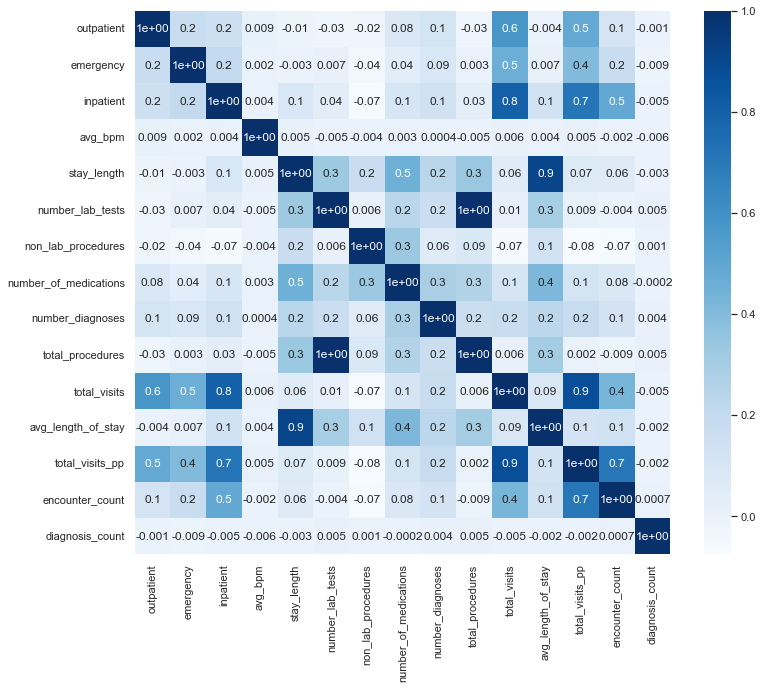

In [119]:
cor_spearman = train_engineering[metric_features].corr(method ='spearman')
cor_spearman

def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = "Blues", fmt='.1')
    plt.show()

cor_heatmap(cor_spearman)

<a class="anchor" id="cs"></a>

## <span style="color:black">12.2. Chi-Square </span>

Dividing train into categorical and numeric.

In [120]:
train_num = X_train[metric_features].set_index(X_train.index)
train_cat = X_train[non_metric_features].set_index(X_train.index)

In [121]:
train_cat.columns

Index(['race', 'gender', 'age', 'payer_code', 'admission_type',
       'medical_specialty', 'discharge_disposition', 'admission_source',
       'glucose', 'a1c', 'meds_change', 'prescribed_diabetes_meds',
       'medication', 'insurance', 'caucasian', 'diabetes_type', 'age_group',
       'diag1_type', 'diag2_type', 'diag_add_type'],
      dtype='object')

In [122]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

for var in train_cat:
    TestIndependence(train_cat[var],y_train,var)

race is IMPORTANT for Prediction
gender is NOT an important predictor. (Discard gender from model)
age is IMPORTANT for Prediction
payer_code is IMPORTANT for Prediction
admission_type is NOT an important predictor. (Discard admission_type from model)
medical_specialty is IMPORTANT for Prediction
discharge_disposition is IMPORTANT for Prediction
admission_source is NOT an important predictor. (Discard admission_source from model)
glucose is NOT an important predictor. (Discard glucose from model)
a1c is NOT an important predictor. (Discard a1c from model)
meds_change is NOT an important predictor. (Discard meds_change from model)
prescribed_diabetes_meds is IMPORTANT for Prediction
medication is IMPORTANT for Prediction
insurance is NOT an important predictor. (Discard insurance from model)
caucasian is NOT an important predictor. (Discard caucasian from model)
diabetes_type is IMPORTANT for Prediction
age_group is IMPORTANT for Prediction
diag1_type is IMPORTANT for Prediction
diag2_t

<a class="anchor" id="rfe"></a>

## <span style="color:black">12.3. Recursive Feature Elimination - RFE </span>

In [123]:
nof_list = np.arange(1, X_train.shape[1])
high_score = 0
# Variable to store the optimum features
nof = 0
train_score_list = []
val_score_list = []

for n in range(len(nof_list)):
    model = LogisticRegression(random_state=42)

    rfe = RFE(estimator=model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe, y_train)

    # storing results on training data
    train_pred = model.predict(X_train_rfe)
    train_score = f1_score(y_train, train_pred)
    train_score_list.append(train_score)

    # storing results on validation data
    val_pred = model.predict(X_val_rfe)
    val_score = f1_score(y_val, val_pred)
    val_score_list.append(val_score)

    # check best score
    if val_score >= high_score:
        high_score = val_score
        nof = nof_list[n]

print("Optimum number of features: %d" % nof)
print("F1 score with %d features: %f" % (nof, high_score))

Optimum number of features: 7
F1 score with 7 features: 0.292521


In [124]:
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=7)
X_rfe = rfe.fit_transform(X_train, y_train)
rfe.support_
rfe.ranking_
selected_features = np.where(rfe.support_)[0]
selected_feature_names = [X_train.columns[i] for i in selected_features]
selected_feature_names

['emergency',
 'inpatient',
 'medical_specialty',
 'discharge_disposition',
 'medication',
 'encounter_count',
 'diag2_type']

<a class="anchor" id="lasso"></a>

## <span style="color:black">12.4. LASSO </span>

Lasso picked 34 variables and eliminated the other 1 variables


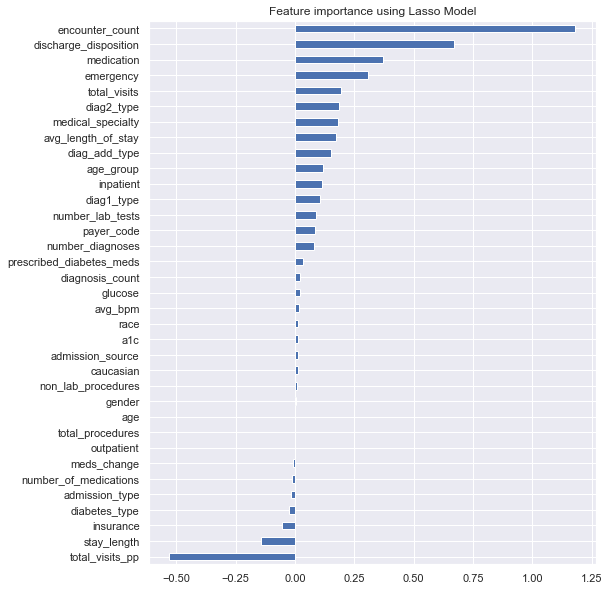

In [125]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()
    
reg = LassoCV()
reg.fit(X_train, y_train)

coef = pd.Series(reg.coef_, index = X_train.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

coef.sort_values()

plot_importance(coef,'Lasso')

In [126]:
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)

Best alpha using built-in LassoCV: 0.000016


In [127]:
print("Best score using built-in LassoCV: %f" %reg.score(X_train, y_train))

Best score using built-in LassoCV: 0.123594


In [128]:
coef = pd.Series(reg.coef_, index = X_train.columns)
coef

race                        0.014632
gender                      0.004908
age                         0.001533
payer_code                  0.085286
outpatient                 -0.000000
emergency                   0.308287
inpatient                   0.115099
admission_type             -0.016559
medical_specialty           0.182772
avg_bpm                     0.018364
discharge_disposition       0.671006
admission_source            0.011499
stay_length                -0.142333
number_lab_tests            0.090011
non_lab_procedures          0.009372
number_of_medications      -0.011343
number_diagnoses            0.082176
glucose                     0.020451
a1c                         0.014317
meds_change                -0.009761
prescribed_diabetes_meds    0.033972
medication                  0.370394
insurance                  -0.055903
caucasian                   0.010913
diagnosis_count             0.021213
diabetes_type              -0.023657
total_procedures            0.000116
t

<a class="anchor" id="kb"></a>

## <span style="color:black">12.5. K-best </span>

In [129]:
selector = SelectKBest(score_func=mutual_info_classif)
selector.fit_transform(X_train, y_train)
X_train.columns[selector.get_support()]

Index(['outpatient', 'emergency', 'inpatient', 'avg_bpm',
       'discharge_disposition', 'diabetes_type', 'total_visits',
       'encounter_count', 'avg_length_of_stay', 'total_visits_pp'],
      dtype='object')

<a class="anchor" id="rf"></a>

## <span style="color:black">12.6. Random Forest </span>

In [130]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [131]:
sel.get_support()
X_train.columns[(sel.get_support())]

Index(['age', 'avg_bpm', 'discharge_disposition', 'stay_length',
       'number_lab_tests', 'number_of_medications', 'medication',
       'total_procedures', 'encounter_count', 'avg_length_of_stay',
       'total_visits_pp', 'diag1_type', 'diag2_type', 'diag_add_type'],
      dtype='object')

<a class="anchor" id="dec"></a>

## <span style="color:black">12.7. Final Decision </span>

In [132]:
data = pd.read_excel('FeatureSelection.xlsx', index_col='Variables')
data['% Keep'] = (data['% Keep'] * 100).astype(int)
def highlight_keep_rows(row):
    if row['Decision'] == 'Keep':
        return ['background-color: #d4edda'] * len(row)
    else:
        return [''] * len(row)
styled_data = data.style.apply(highlight_keep_rows, axis=1)
styled_data

,Spearman,Chi-Square,RFE Logistic,Lasso,Kbest,Random Forest,% Keep,Decision
Variables,,,,,,,,
race,-,Keep,Discard,Keep,Discard,Discard,40,Discard
gender,-,Discard,Discard,Keep,Discard,Discard,20,Discard
age,-,Keep,Discard,Keep,Discard,Keep,60,Keep
payer_code,-,Keep,Discard,Keep,Discard,Discard,40,Discard
outpatient,Keep,-,Discard,Discard,Discard,Discard,20,Discard
emergency,Keep,-,Keep,Keep,Keep,Discard,80,Keep
inpatient,Keep,-,Keep,Keep,Keep,Discard,80,Keep
admission_type,-,Discard,Discard,Keep,Keep,Discard,40,Discard
medical_specialty,-,Keep,Keep,Keep,Discard,Discard,60,Keep


In [133]:
X_train.drop(['race', 'gender', 'payer_code', 'outpatient', 'admission_type','avg_bpm',
              'admission_source', 'non_lab_procedures', 'number_diagnoses', 'glucose', 'a1c', 
              'meds_change','prescribed_diabetes_meds', 'caucasian', 'insurance', 'diagnosis_count',
              'total_procedures', 'age_group', 'diabetes_type'], axis=1, inplace=True)

In [134]:
X_val.drop(['race', 'gender', 'payer_code', 'outpatient', 'admission_type','avg_bpm',
              'admission_source', 'non_lab_procedures', 'number_diagnoses', 'glucose', 'a1c', 
              'meds_change','prescribed_diabetes_meds', 'caucasian', 'insurance', 'diagnosis_count',
              'total_procedures', 'age_group', 'diabetes_type'], axis=1, inplace=True)

In [135]:
X_test.drop(['race', 'gender', 'payer_code', 'outpatient', 'admission_type','avg_bpm',
              'admission_source', 'non_lab_procedures', 'number_diagnoses', 'glucose', 'a1c', 
              'meds_change','prescribed_diabetes_meds', 'caucasian', 'insurance', 'diagnosis_count',
              'total_procedures', 'age_group', 'diabetes_type'], axis=1, inplace=True)

In [136]:
X_train_no_res.drop(['race', 'gender', 'payer_code', 'outpatient', 'admission_type','avg_bpm',
              'admission_source', 'non_lab_procedures', 'number_diagnoses', 'glucose', 'a1c', 
              'meds_change','prescribed_diabetes_meds', 'caucasian', 'insurance', 'diagnosis_count',
              'total_procedures', 'age_group', 'diabetes_type'], axis=1, inplace=True)

<hr style="border: 1px solid black;">
<a class="anchor" id="models"></a>

# <span style="color:black">13. Models </span>

In [137]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, labels_train))
    print(confusion_matrix(y_train, labels_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, labels_val))
    print(confusion_matrix(y_val, labels_val))

<a class="anchor" id="bayes"></a>

## <span style="color:black">13.1. Bayes Classifier </span>

* Default Parameteres

In [138]:
model_bayes = GaussianNB().fit(X_train, y_train)

In [139]:
X_train

,age,emergency,inpatient,medical_specialty,discharge_disposition,stay_length,number_lab_tests,number_of_medications,medication,total_visits,encounter_count,avg_length_of_stay,total_visits_pp,diag1_type,diag2_type,diag_add_type
encounter_id,,,,,,,,,,,,,,,,
477398,0.333333,0.000000,0.000000,0.678178,0.277633,0.153846,0.275000,0.291667,0.431617,0.000000,0.000000,0.153846,0.000000,0.273719,0.574890,0.632980
755102,0.266667,0.000000,0.000000,0.678178,0.154892,0.230769,0.166667,0.541667,0.549814,0.000000,0.000000,0.230769,0.000000,0.547572,0.643867,0.480852
620778,0.222222,0.000000,0.000000,0.678178,0.238033,0.153846,0.141667,0.250000,0.415963,0.000000,0.000000,0.153846,0.000000,0.547572,0.596337,0.858870
181365,0.222222,0.071429,0.333333,0.638485,0.277633,0.230769,0.250000,0.437500,0.549814,0.227273,0.166667,0.153846,0.100000,0.569467,0.633743,0.480852
393395,0.000000,0.000000,0.222222,0.678178,0.154892,0.153846,0.308333,0.250000,0.415963,0.227273,0.000000,0.153846,0.038462,0.444391,0.633743,0.480852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353214,0.111111,0.000000,0.000000,0.689522,0.154892,0.307692,0.575000,0.312500,0.483966,0.000000,0.000000,0.307692,0.000000,0.686131,0.574890,0.606310
630650,0.666667,0.000000,0.000000,0.638485,0.277633,0.923077,0.608333,0.354167,0.415963,0.000000,0.000000,0.923077,0.000000,0.444391,0.635293,0.480852
600806,0.222222,0.000000,0.000000,0.678178,0.154892,0.384615,0.508333,0.333333,0.461569,0.000000,0.000000,0.384615,0.000000,0.569467,0.633743,0.606310


In [140]:
labels_train = model_bayes.predict(X_train)
labels_val = model_bayes.predict(X_val)

In [141]:
model_bayes.predict_proba(X_val)

array([[0.17896839, 0.82103161],
       [0.97313202, 0.02686798],
       [0.909621  , 0.090379  ],
       ...,
       [0.97690019, 0.02309981],
       [0.99297746, 0.00702254],
       [0.97841342, 0.02158658]])

In [142]:
print('Train:', f1_score(y_train, labels_train))
print('Validation:', f1_score(y_val, labels_val))

Train: 0.45922800049646273
Validation: 0.2634939059779454


In [143]:
metrics(y_train, labels_train, y_val, labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.87      0.69      5477
           1       0.72      0.34      0.46      5477

    accuracy                           0.60     10954
   macro avg       0.64      0.60      0.57     10954
weighted avg       0.64      0.60      0.57     10954

[[4747  730]
 [3627 1850]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

<a class="anchor" id="knnmodel"></a>

## <span style="color:black">13.2. KNN </span>

Default Parameters

In [144]:
modelKNNT = KNeighborsClassifier().fit(X_train, y_train)

In [145]:
labels_train = modelKNNT.predict(X_train)
labels_val = modelKNNT.predict(X_val)

In [146]:
print('Train:',f1_score(y_train, labels_train))
print('Validation:', f1_score(y_val, labels_val))

Train: 0.7174591171188204
Validation: 0.24283163533242308


In [147]:
metrics(y_train, labels_train, y_val, labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.76      0.74      5477
           1       0.74      0.69      0.72      5477

    accuracy                           0.73     10954
   macro avg       0.73      0.73      0.73     10954
weighted avg       0.73      0.73      0.73     10954

[[4170 1307]
 [1682 3795]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

In [148]:
# clf = GridSearchCV(estimator=KNeighborsClassifier(),
#                    param_grid={
#                        'algorithm': ['ball_tree', 'kd_tree', 'brute'],
#                        'weights': ['uniform', 'distance'],
#                        'leaf_size':
#                        (5, 50, 100),
#                        'n_jobs': (1, -1, -2),
#                        'n_neighbors':[1,5,10]
#                    })
# clf.fit(X_train, y_train)
# clf.best_params_

In [149]:
# numberK_list = np.arange(1, 20)
# high_score = 0
# best_f1_score = 0
# best_nof = 0
# score_list_train = []
# score_list_val = []
# f1_list_train = []
# f1_list_val = []
# for n in numberK_list:
#     model = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
#     score_train = model.score(X_train, y_train)
#     score_val = model.score(X_val, y_val)
#     score_list_train.append(score_train)
#     score_list_val.append(score_val)

#     y_pred_train = model.predict(X_train)
#     y_pred_val = model.predict(X_val)

#     f1_train = f1_score(y_train, y_pred_train)
#     f1_val = f1_score(y_val, y_pred_val)

#     f1_list_train.append(f1_train)
#     f1_list_val.append(f1_val)

#     if f1_val > high_score:
#         high_score = f1_val
#         best_f1_score = f1_list_val[n - 1]
#         best_nof = numberK_list[n - 1]

# print("Best number of neighbors: %d" % best_nof)
# print("Mean F1 score in train with %d neighbors: %f" % (best_nof, f1_list_train[best_nof - 1]))
# print("Mean F1 score in validation with %d neighbors: %f" % (best_nof, best_f1_score))

Best number of neighbors: 19
Mean F1 score in train with 19 neighbors: 0.644610
Mean F1 score in validation with 19 neighbors: 0.273782


In [150]:
# param_dist = {
#     'algorithm': ['ball_tree', 'kd_tree', 'brute'],
#     'weights': ['uniform', 'distance'],
#     'leaf_size':randint(5, 100),
#     'n_jobs': (1, -1, -2),
#     'n_neighbors':randint(1, 50)
# }

# base_model = KNeighborsClassifier()

# random_search = RandomizedSearchCV(
#     base_model,
#     param_distributions=param_dist,
#     n_iter=10, 
#     cv=5,      
#     scoring='f1',  
#     random_state=42,
#     n_jobs=-1,
# )

# random_search.fit(X_train, y_train)

# print("Best Hyperparameters:", random_search.best_params_)

# best_model = random_search.best_estimator_

# train_pred = best_model.predict(X_train)
# train_f1 = f1_score(y_train, train_pred)
# print("Train:", train_f1)

# val_pred = best_model.predict(X_val)
# val_f1 = f1_score(y_val, val_pred)
# print("Validation:", val_f1)

Best Hyperparameters: {'algorithm': 'brute', 'leaf_size': 66, 'n_jobs': -1, 'n_neighbors': 47, 'weights': 'distance'}
Train: 1.0
Validation: 0.28332044341325086


In [151]:
modelKNNT = KNeighborsClassifier(algorithm='brute', leaf_size=56, n_jobs=1, n_neighbors=19, weights='uniform').fit(X_train, y_train)

In [152]:
labels_train = modelKNNT.predict(X_train)
labels_val = modelKNNT.predict(X_val)

In [153]:
print('Train:',f1_score(y_train, labels_train))
print('Validation:', f1_score(y_val, labels_val))

Train: 0.6446102493618693
Validation: 0.2737824578197918


<a class="anchor" id="dt"></a>

## <span style="color:black">13.3. Decision Trees </span>

In [154]:
modelDT = DecisionTreeClassifier(random_state=42, class_weight = 'balanced').fit(X_train_no_res, y_train_no_res)

In [155]:
labels_train =modelDT.predict(X_train_no_res)
labels_val = modelDT.predict(X_val)

In [156]:
print('Train:', f1_score(y_train_no_res, labels_train))
print('Validation:', f1_score(y_val, labels_val))

Train: 1.0
Validation: 0.18363360104189277


In [157]:
metrics(y_train_no_res, labels_train, y_val, labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43005
           1       1.00      1.00      1.00      5477

    accuracy                           1.00     48482
   macro avg       1.00      1.00      1.00     48482
weighted avg       1.00      1.00      1.00     48482

[[43005     0]
 [    0  5477]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [ ]:
# dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
#                    param_grid={
#                        'criterion': ['gini', 'entropy', 'log_loss'],
#                        'splitter': ['best', 'random'],
#                        'max_depth': [2,3,4,5,6],
#                        'max_features': [2,4,6,8, None],
#                        'max_leaf_nodes': [4,8,12, None]
#                    })
# dt_grid_search.fit(X_train, y_train)
# dt_grid_search.best_params_

In [158]:
# param_dist = {
#    'criterion': ['gini', 'entropy', 'log_loss'],
#                        'splitter': ['best', 'random'],
#                        'max_depth': (1,20),
#                        'max_features': [2,4,6,8, None],
#                        'max_leaf_nodes': [4,8,12, None]
# }

# base_model = DecisionTreeClassifier(random_state=42, class_weight = 'balanced')

# random_search = RandomizedSearchCV(
#     base_model,
#     param_distributions=param_dist,
#     n_iter=10, 
#     cv=5,      
#     scoring='f1',  
#     random_state=42,
#     n_jobs=-1,
# )

# random_search.fit(X_train_no_res, y_train_no_res)

# print("Best Hyperparameters:", random_search.best_params_)

# best_model = random_search.best_estimator_

# train_pred = best_model.predict(X_train_no_res)
# train_f1 = f1_score(y_train_no_res, train_pred)
# print("Train F1-score:", train_f1)

# val_pred = best_model.predict(X_val)
# val_f1 = f1_score(y_val, val_pred)
# print("Validation F1-score:", val_f1)

Best Hyperparameters: {'splitter': 'random', 'max_leaf_nodes': None, 'max_features': 6, 'max_depth': 20, 'criterion': 'entropy'}
Train F1-score: 0.518821992637454
Validation F1-score: 0.23712132861756113


In [159]:
modelDT = DecisionTreeClassifier(splitter= 'best', max_leaf_nodes = 6, max_features=10, max_depth=2, 
                                 criterion='gini', random_state=42, class_weight = 'balanced')
modelDT.fit(X_train_no_res, y_train_no_res)
labels_train =modelDT.predict(X_train_no_res)
labels_val = modelDT.predict(X_val)
print('Train:', f1_score(y_train_no_res,labels_train))
print('Validation:', f1_score(y_val,labels_val))

Train: 0.3320661565045668
Validation: 0.30251625671473


<a class="anchor" id="lr"></a>
## <span style="color:black">13.4. Logistic Regression </span>

In [160]:
log_reg = LogisticRegression(class_weight='balanced', random_state=42).fit(X_train_no_res, y_train_no_res)

In [161]:
labels_train = log_reg.predict(X_train_no_res)
labels_val = log_reg.predict(X_val)

In [162]:
log_reg.predict_proba(X_val)

array([[0.52661558, 0.47338442],
       [0.63222562, 0.36777438],
       [0.53977805, 0.46022195],
       ...,
       [0.68373432, 0.31626568],
       [0.75836783, 0.24163217],
       [0.71856601, 0.28143399]])

In [163]:
print('Train:', f1_score(y_train_no_res, labels_train))
print('Validation:', f1_score(y_val, labels_val))

Train: 0.31323760818253343
Validation: 0.2887686062246279


In [164]:
metrics(y_train_no_res, labels_train, y_val, labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.73      0.82     43005
           1       0.21      0.58      0.31      5477

    accuracy                           0.71     48482
   macro avg       0.57      0.66      0.57     48482
weighted avg       0.85      0.71      0.76     48482

[[31331 11674]
 [ 2292  3185]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [165]:
log_reg = LogisticRegression(class_weight='balanced', max_iter=500, random_state=42).fit(X_train_no_res, y_train_no_res)

In [166]:
labels_train = log_reg.predict(X_train_no_res)
labels_val = log_reg.predict(X_val)

In [167]:
print('Train:', f1_score(y_train_no_res, labels_train))
print('Validation:', f1_score(y_val, labels_val))

Train: 0.31323760818253343
Validation: 0.2887686062246279


<a class="anchor" id="nn"></a>

## <span style="color:black">13.5. Neural Network </span>

In [168]:
modelNN = MLPClassifier(random_state=42).fit(X_train, y_train)

In [169]:
labels_train = modelNN.predict(X_train)
labels_val = modelNN.predict(X_val)

In [170]:
print('Train:', f1_score(labels_train, y_train))
print('Validation:', f1_score(labels_val, y_val)) 

Train: 0.686195601310248
Validation: 0.31497051072907517


In [171]:
# NN = GridSearchCV(estimator=MLPClassifier(max_iter=1000000, warm_start=True),
#                    param_grid={
#                        'solver': ['adam', 'sgd', 'lbfgs'],
#                        'learning_rate' = ['adaptive', 'invscaling', 'constant'],
#                        'batch_size': (10, 20, 40, 60, 80, 100),
#                        'activation': ['identity', 'relu', 'logistic', 'tanh'],
#                        'hidden_layer_sizes':
#                        (8, 100, 500, [100, 100], [100, 100, 100],
#                         [100, 100, 100, 100, 100])
#                    })
# NN.fit(X_train, y_train)
# NN.best_params_

In [172]:
# param_dist = {
#    'solver': ['adam', 'sgd', 'lbfgs'],
#                        'learning_rate' : ['adaptive', 'invscaling', 'constant'],
#                        'batch_size': randint(10, 100),
#                        'activation': ['identity', 'relu', 'logistic', 'tanh'],
#                        'hidden_layer_sizes':
#                        (8, 100, 500, [100, 100]
#                         )
# }

# base_model = MLPClassifier(random_state=42)

# random_search = RandomizedSearchCV(
#     base_model,
#     param_distributions=param_dist,
#     n_iter=10, 
#     cv=5,      
#     scoring='f1',  
#     random_state=42,
#     n_jobs=-1,
# )

# random_search.fit(X_train, y_train)

# print("Best Hyperparameters:", random_search.best_params_)

# best_model = random_search.best_estimator_

# train_pred = best_model.predict(X_train)
# train_f1 = f1_score(y_train, train_pred)
# print("Train F1-score:", train_f1)

# val_pred = best_model.predict(X_val)
# val_f1 = f1_score(y_val, val_pred)
# print("Validation F1-score:", val_f1)

Best Hyperparameters: {'activation': 'tanh', 'batch_size': 67, 'hidden_layer_sizes': 100, 'learning_rate': 'adaptive', 'solver': 'adam'}
Train F1-score: 0.6763320712900545
Validation F1-score: 0.318517591085514


In [173]:
modelNN = MLPClassifier(activation = 'tanh', 
                        batch_size = 50, hidden_layer_sizes = 100, 
                        learning_rate = 'adaptive', solver = 'adam',
                       random_state=42).fit(X_train, y_train)

In [174]:
labels_train = modelNN.predict(X_train)
labels_val kn= modelNN.predict(X_val)

In [175]:
print('Train:', f1_score(y_train, labels_train))
print('Validation:', f1_score(y_val, labels_val))

Train: 0.6682491454614509
Validation: 0.31962365591397845


In [176]:
metrics(y_train, labels_train, y_val, labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.72      0.69      5477
           1       0.70      0.64      0.67      5477

    accuracy                           0.68     10954
   macro avg       0.68      0.68      0.68     10954
weighted avg       0.68      0.68      0.68     10954

[[3941 1536]
 [1958 3519]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
----------------------------------------------------------------------------------------------------------

<a class="anchor" id="svm"></a>

## <span style="color:black">13.6. Suport Vector Machines </span>

In [177]:
modelSVM = SVC(kernel='linear', class_weight = 'balanced').fit(X_train_no_res, y_train_no_res)

In [178]:
labels_train = modelSVM.predict(X_train_no_res)
labels_val = modelSVM.predict(X_val)

In [179]:
print('Train:', f1_score(labels_train, y_train_no_res))
print('Validation', f1_score(labels_val, y_val))

Train: 0.31755369332371386
Validation 0.29698149951314506


In [180]:
# clf = GridSearchCV(estimator=svm.SVC(),
#                    param_grid={
#                        'C': [10, 100, 1000, 1500, 2000],
#                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1.5, 2],
#                        'kernel': ['rbf', 'linear']
#                    })
# clf.fit(final_dataset, target)
# clf.best_params_

In [182]:
# param_dist = {
#   'C': [10, 15],
#                        'gamma': [0.1, 2],
#                        'kernel': ['rbf', 'linear']
# }

# base_model = SVC(random_state=42, class_weight='balanced')

# random_search = RandomizedSearchCV(
#     base_model,
#     param_distributions=param_dist,
#     n_iter=10, 
#     cv=5,      
#     scoring='f1',  
#     random_state=42,
#     n_jobs=-1,
# )

# random_search.fit(X_train_no_res, y_train_no_res)

# print("Best Hyperparameters:", random_search.best_params_)

# best_model = random_search.best_estimator_

# train_pred = best_model.predict(X_train_no_res)
# train_f1 = f1_score(y_train_no_res, train_pred)
# print("Train F1-score:", train_f1)

# val_pred = best_model.predict(X_val)
# val_f1 = f1_score(y_val, val_pred)
# print("Validation F1-score:", val_f1)

Best Hyperparameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
Train F1-score: 0.32430723843641346
Validation F1-score: 0.3063007818488426


In [183]:
modelSVM = SVC(C=110, gamma=0.01, kernel='rbf', class_weight = 'balanced', random_state=42).fit(X_train_no_res, y_train_no_res)

In [184]:
labels_train = modelSVM.predict(X_train_no_res)
labels_val = modelSVM.predict(X_val)

In [185]:
print('Train:', f1_score(labels_train, y_train_no_res))
print('Validation', f1_score(labels_val, y_val))

Train: 0.32139190576538607
Validation 0.29965484781926577


<a class="anchor" id="rfmodel"></a>

## <span style="color:black">13.7. Random Forest </span>

In [186]:
rf = RandomForestClassifier(random_state=42, class_weight= 'balanced')

In [187]:
rf.fit(X_train_no_res, y_train_no_res) 

RandomForestClassifier(class_weight='balanced', random_state=42)

In [188]:
labels_train = rf.predict(X_train_no_res)
labels_val = rf.predict(X_val)

In [189]:
print('Train:', f1_score(y_train_no_res, labels_train))
print('Validation:', f1_score(y_val, labels_val))

Train: 0.9992691394116572
Validation: 0.020550760378133994


In [190]:
metrics(y_train_no_res, labels_train, y_val, labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43005
           1       1.00      1.00      1.00      5477

    accuracy                           1.00     48482
   macro avg       1.00      1.00      1.00     48482
weighted avg       1.00      1.00      1.00     48482

[[43005     0]
 [    8  5469]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [ ]:
# rf_grid_search  = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
#                    param_grid={
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20],
#     'max_samples':[0.2,0.4,0.6,0.8,None],
#     'max_features':['sqrt', 'log2', None],

# })
# rf_grid_search.fit(X_train_no_res, y_train_no_res)
# rf_grid_search.best_params_

In [192]:
# param_dist = {
#    'n_estimators': randint(100, 300),
#     'max_depth': [None, 10, 20],
#     'max_samples':[0.2,0.4,0.6,0.8,None],
#     'max_features':['sqrt', 'log2', None]
# }

# base_model = RandomForestClassifier(random_state=42, class_weight = 'balanced')

# random_search = RandomizedSearchCV(
#     base_model,
#     param_distributions=param_dist,
#     n_iter=10, 
#     cv=5,      
#     scoring='f1',  
#     random_state=42,
#     n_jobs=-1,
# )

# random_search.fit(X_train_no_res, y_train_no_res)

# print("Best Hyperparameters:", random_search.best_params_)

# best_model = random_search.best_estimator_

# train_pred = best_model.predict(X_train_no_res)
# train_f1 = f1_score(y_train_no_res, train_pred)
# print("Train F1-score:", train_f1)

# val_pred = best_model.predict(X_val)
# val_f1 = f1_score(y_val, val_pred)
# print("Validation F1-score:", val_f1)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'max_samples': 0.4, 'n_estimators': 291}
Train F1-score: 0.4018745660726684
Validation F1-score: 0.30485470680354965


In [193]:
model_rf=RandomForestClassifier(n_estimators= 300, max_samples = 0.4, random_state = 42,
                                max_depth = 1, max_features='log2', class_weight = 'balanced'
                               ).fit(X_train_no_res, y_train_no_res) 

In [194]:
labels_train = model_rf.predict(X_train_no_res)
labels_val = model_rf.predict(X_val)

In [195]:
f1_score_train = f1_score(y_train_no_res, labels_train)
f1_score_val = f1_score(y_val, labels_val)
difference = f1_score_train - f1_score_val

In [196]:
print('Train:', f1_score_train)
print('Validation:', f1_score_val)
print('Difference between Training and Validation F1 scores:', round(difference, 4))

Train: 0.3152885706801711
Validation: 0.30125625076228807
Difference between Training and Validation F1 scores: 0.014


In [197]:
metrics(y_train_no_res, labels_train, y_val, labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     43005
           1       0.21      0.66      0.32      5477

    accuracy                           0.68     48482
   macro avg       0.57      0.67      0.55     48482
weighted avg       0.86      0.68      0.73     48482

[[29187 13818]
 [ 1866  3611]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
------------------------------------------------------------------------------------------------------

In [198]:
results.reset_index(inplace=True)

In [199]:
results['readmitted_binary'].replace(0,'No',inplace=True)

In [200]:
labels_test = model_rf.predict(X_test)

In [201]:
index = X_test.index.T
results_final = pd.DataFrame([index, labels_test]).T
results_final.columns = ['encounter_id','readmitted_binary']
results_final['readmitted_binary'].replace(1,'Yes',inplace=True)
results_final['readmitted_binary'].replace(0,'No',inplace=True)

In [202]:
results_final = results_final.append(results, ignore_index=True)

In [203]:
results_final.to_csv('Group27_Version20.csv', index=None)

In [204]:
results_final['readmitted_binary'].unique()

array(['No', 'Yes'], dtype=object)

## Global Evaluation

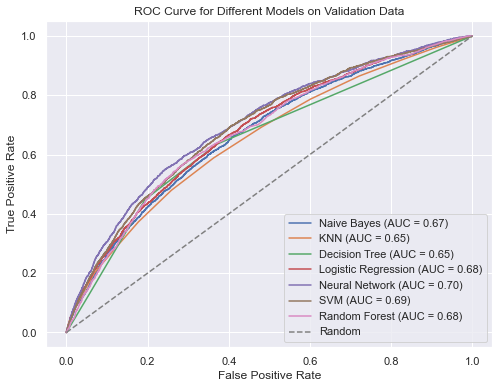

In [205]:
models = [
    ('Naive Bayes', model_bayes),
    ('KNN', modelKNNT),
    ('Decision Tree', modelDT),
    ('Logistic Regression', log_reg),
    ('Neural Network', modelNN),
    ('SVM', modelSVM),
    ('Random Forest', model_rf)
]


plt.figure(figsize=(8, 6))

for name, model in models:
    if hasattr(model, "predict_proba"):  # Checking if the model supports predict_proba
        probs = model.predict_proba(X_val)[:, 1]
    else:
        probs = model.decision_function(X_val)  # For models like SVM that don't have predict_proba
    
    fpr, tpr, _ = roc_curve(y_val, probs)
    auc_value = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models on Validation Data')
plt.legend()
plt.show()